# A1 Hindsight - Harrison Hauff - 48832061

## Objectives of this Assignment

#### In this Assignment I will be performing Data Analysis on a Structured Dataset. This will be done through addressing 6 tasks within the dataset.

### Tasks

1. Data Preperation
2. Exploratory Data Analysis
3. Basic Descriptive Statistics Analysis
4. Determining Correlations
5. Clustering
6. Principal Component Analysis

# Task 1: Data Preperation

To begin the project I will first read the dataset, utilising the pandas python library, and determining whether there is any missing data within the dataset.

In [207]:
import pandas as pd

bean_information = pd.read_csv("Drybean_dataset_2025.csv")

bean_information.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity    roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856  0.958027126   
1      0.411785     29172.0     191.272751  0.783968  0.984986  0.887033637   
2      0.562727     29690.0     193.410904  0.778113  0.989559  0.947849473   
3      0.498616     30724.0     195.467062  0.782681  0.976696  0.903936374   
4      0.333680     30417.0     195.896503  0.773098  0.990893  0.984877069   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [208]:
bean_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3860 non-null   object 
 1   Perimeter        3870 non-null   float64
 2   MajorAxisLength  3869 non-null   float64
 3   MinorAxisLength  3870 non-null   float64
 4   AspectRation     3869 non-null   float64
 5   Eccentricity     3871 non-null   float64
 6   ConvexArea       3870 non-null   float64
 7   EquivDiameter    3867 non-null   float64
 8   Extent           3870 non-null   float64
 9   Solidity         3870 non-null   float64
 10  roundness        3871 non-null   object 
 11  Compactness      3870 non-null   float64
 12  ShapeFactor1     3870 non-null   float64
 13  ShapeFactor2     3870 non-null   float64
 14  ShapeFactor3     3869 non-null   float64
 15  ShapeFactor4     3870 non-null   float64
 16  Class            3870 non-null   object 
dtypes: float64(14)

Given we have 3871 entries, we can see that some attributes have missing values, to get an exact count we'll utilise pandas to sum up the total amount of times where an entry is null. 

In [209]:
bean_information.isna().sum()

Area               11
Perimeter           1
MajorAxisLength     2
MinorAxisLength     1
AspectRation        2
Eccentricity        0
ConvexArea          1
EquivDiameter       4
Extent              1
Solidity            1
roundness           0
Compactness         1
ShapeFactor1        1
ShapeFactor2        1
ShapeFactor3        2
ShapeFactor4        1
Class               1
dtype: int64

As evident above, we do have characteristics missing only a few entries, while Eccentricity and Roundness both have no missing entries. Although these columns are only missing a few entries, I thought it would be appropriate to impute the missing data using the known data, doing this preserves the rows while maintaining a fair estimate which can still be insightful for our data analysis. 

First we'll compute the mean of the non-missing values for Area as it has the most missing values of any attribute in the dataset. Doing this requires us to convert the Area values from a string to an integer. 

In [210]:
# Convert to numeric safely
bean_information["Area"] = pd.to_numeric(bean_information["Area"], errors="coerce")

# Compute mean and round it
non_missing_area_mean = round(bean_information["Area"].mean())

# Fill missing values with the rounded mean
bean_information["Area"] = bean_information["Area"].fillna(non_missing_area_mean)


We'll check if imputing these values was successful in removing any empty columns. 

In [211]:
# verify that missing values are imputed in Area
bean_information.isna().sum()

Area               0
Perimeter          1
MajorAxisLength    2
MinorAxisLength    1
AspectRation       2
Eccentricity       0
ConvexArea         1
EquivDiameter      4
Extent             1
Solidity           1
roundness          0
Compactness        1
ShapeFactor1       1
ShapeFactor2       1
ShapeFactor3       2
ShapeFactor4       1
Class              1
dtype: int64

If we apply this to the rest of the attributes in the dataset.

#### Perimeter

In [212]:
bean_information["Perimeter"] = pd.to_numeric(bean_information["Perimeter"], errors="coerce")

non_missing_perimeter_mean = bean_information["Perimeter"].mean()

bean_information["Perimeter"] = bean_information["Perimeter"].fillna(non_missing_perimeter_mean)

#### Major Axis Length

In [213]:
bean_information["MajorAxisLength"] = pd.to_numeric(bean_information["MajorAxisLength"], errors="coerce")

non_missing_MAL_mean = bean_information["MajorAxisLength"].mean()

bean_information["MajorAxisLength"] = bean_information["MajorAxisLength"].fillna(non_missing_MAL_mean)

#### Minor Axis Length

In [214]:
bean_information["MinorAxisLength"] = pd.to_numeric(bean_information["MinorAxisLength"], errors="coerce")

non_missing_MAL_mean = bean_information["MinorAxisLength"].mean()

bean_information["MinorAxisLength"] = bean_information["MinorAxisLength"].fillna(non_missing_MAL_mean)

#### Aspect Ratio n

In [215]:
bean_information["AspectRation"] = pd.to_numeric(bean_information["AspectRation"], errors="coerce")

non_missing_ASN_mean = bean_information["AspectRation"].mean()

bean_information["AspectRation"] = bean_information["AspectRation"].fillna(non_missing_ASN_mean)

#### Convex Area

In [216]:
bean_information["ConvexArea"] = pd.to_numeric(bean_information["ConvexArea"], errors="coerce")

non_missing_CA_mean = bean_information["ConvexArea"].mean()

bean_information["ConvexArea"] = bean_information["ConvexArea"].fillna(non_missing_CA_mean)

#### Equiv Diameter

In [217]:
bean_information["EquivDiameter"] = pd.to_numeric(bean_information["EquivDiameter"], errors="coerce")

non_missing_ED_mean = bean_information["EquivDiameter"].mean()

bean_information["EquivDiameter"] = bean_information["EquivDiameter"].fillna(non_missing_ED_mean)

#### Extent

In [218]:
bean_information["Extent"] = pd.to_numeric(bean_information["Extent"], errors="coerce")

non_missing_extent_mean = bean_information["Extent"].mean()

bean_information["Extent"] = bean_information["Extent"].fillna(non_missing_extent_mean)

#### Solidity

In [219]:
bean_information["Solidity"] = pd.to_numeric(bean_information["Solidity"], errors="coerce")

non_missing_solidity_mean = bean_information["Solidity"].mean()

bean_information["Solidity"] = bean_information["Solidity"].fillna(non_missing_solidity_mean)

#### Compactness

In [220]:
bean_information["Compactness"] = pd.to_numeric(bean_information["Compactness"], errors="coerce")

non_missing_compactness_mean = bean_information["Compactness"].mean()

bean_information["Compactness"] = bean_information["Compactness"].fillna(non_missing_compactness_mean)

#### Shape Factor's 1, 2, 3, 4

In [221]:
# Shape Factor 1
bean_information["ShapeFactor1"] = pd.to_numeric(bean_information["ShapeFactor1"], errors="coerce")

non_missing_SF1_mean = bean_information["ShapeFactor1"].mean()

bean_information["ShapeFactor1"] = bean_information["ShapeFactor1"].fillna(non_missing_SF1_mean)

# Shape Factor 2

bean_information["ShapeFactor2"] = pd.to_numeric(bean_information["ShapeFactor2"], errors="coerce")

non_missing_SF2_mean = bean_information["ShapeFactor2"].mean()

bean_information["ShapeFactor2"] = bean_information["ShapeFactor2"].fillna(non_missing_SF2_mean)

# Shape Factor 3

bean_information["ShapeFactor3"] = pd.to_numeric(bean_information["ShapeFactor3"], errors="coerce")

non_missing_SF3_mean = bean_information["ShapeFactor3"].mean()

bean_information["ShapeFactor3"] = bean_information["ShapeFactor3"].fillna(non_missing_SF3_mean)

# Shape Factor 4

bean_information["ShapeFactor4"] = pd.to_numeric(bean_information["ShapeFactor4"], errors="coerce")

non_missing_SF4_mean = bean_information["ShapeFactor4"].mean()

bean_information["ShapeFactor4"] = bean_information["ShapeFactor4"].fillna(non_missing_SF4_mean)



In [222]:
bean_information.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              1
dtype: int64

Given that class is not a numerical data type and is fact a categorical type, I decided it was necessary to delete this row as a mean estimation cannot be made regarding its value, and additionally it is only 1 row and will not have massive ramifications on the information gained from the data. 

#### Class

In [223]:
bean_information = bean_information[bean_information['Class'].notna()]

#### Final Cleaned Dataset

In [224]:
bean_information.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Now checking for any non numerical data types within our numerical variable columns

In [225]:
numeric_data = bean_information[["Area", "Perimeter","MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]]

numeric_data.apply(pd.to_numeric, errors='coerce').isna().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

Given we have selected which variables we know and want to treat as numeric, we can perform operations to drop any non numeric entries. 

In [226]:
# Convert only the selected columns to numeric, coercing errors to NaN
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Drop rows that have any NaN in these selected columns
numeric_data = numeric_data.dropna()



Now we can drop the Not a Number entries, leaving us with all numeric types

In [227]:
# Keep only rows in the original DataFrame that correspond to numeric_data
bean_information = bean_information.loc[numeric_data.index]


Now, checking to see if any NaN values exist, we will find that the data is now clean. 

In [228]:
numeric_data = bean_information[["Area", "Perimeter","MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]]

numeric_data.apply(pd.to_numeric, errors='coerce').isna().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

# Task 2: Exploratory Data Analysis

The purpose of exploratory data analysis (EDA) is to gather an understanding of the datas main characteristics through the use of descriptive statistics and data visualisation.

## 2.1 Univariate EDA

Univariate analysis explores columns/characteristics in isolation in order to ascertain their distribution.

Since we have already have dealt with missing values, we can use the univariate EDA to determine duplicates/outliers and other general data quality issues.

### 2.1.1 Area Univariate EDA

Area as the name suggests, refers to the area of the bean zone, and the number of pixels within its boundaries. 

In [229]:
bean_information["Area"].describe()

count      3870.000000
mean      68051.156072
std       45042.046213
min       28395.000000
25%       38948.500000
50%       48384.500000
75%       73233.000000
max      254616.000000
Name: Area, dtype: float64

Given this is a column containing largely unique numerical data, plotting will be done using a histogram, to calculate the number of bins we will use the common approach of taking the square root of entries as the amount of bins. 

In [230]:
# importing math package in order to take the ceiling of the calculation
import math

# Calculations of bin amounts
entries = 3870
bins = math.ceil(entries**(1/2))
print(bins)

63


Given the result of 63 bins, whenever a histogram will be used to plot a distirbution, this amount will be used. 

In [231]:
area_distribution = bean_information["Area"]
area_distribution


0        28395.0
1        28734.0
2        29380.0
3        30008.0
4        30140.0
          ...   
3866    248424.0
3867    241322.0
3868    251432.0
3869    237270.0
3870    254616.0
Name: Area, Length: 3870, dtype: float64

<Axes: title={'center': 'Bean Area Distribution'}, xlabel='Area', ylabel='Count'>

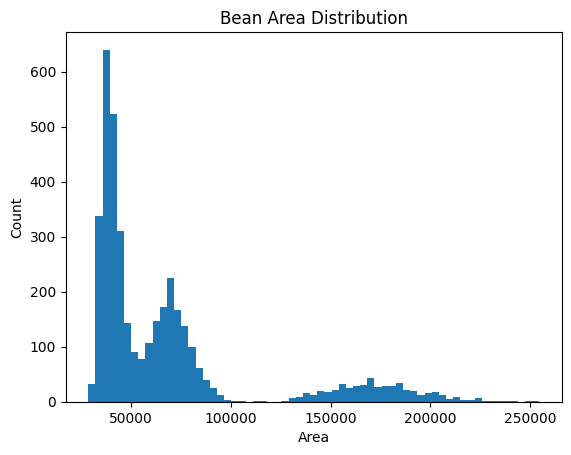

In [232]:
area_distribution.plot.hist(bins=bins, grid=False, xlabel = "Area", ylabel = "Count", title = "Bean Area Distribution")

It can be observed from the distribution above that the area of the beans likely depends on their type, as suspected. The overall distribution appears to be a mixture of three approximately normal sub-distributions. One type of bean has a narrow distribution, indicating low variance in area, while another has a wider distribution, indicating higher variance, although it still maintains an approximately normal shape. These patterns also explain the discrepancy between the mean and median: two of the three bean types generally have areas under 100,000.

### 2.1.2 Perimeter Univariate EDA

The Bean circumference, defined as the length of its border. 

In [233]:
bean_information["Perimeter"].describe()

count    3870.000000
mean      952.196727
std       298.800090
min       610.291000
25%       718.751750
50%       818.168000
75%      1081.358500
max      1985.370000
Name: Perimeter, dtype: float64

In [234]:
perimeter_distribution = bean_information["Perimeter"]
perimeter_distribution

0        610.291
1        638.018
2        624.110
3        645.884
4        620.134
          ...   
3866    1884.557
3867    1895.940
3868    1919.868
3869    1921.685
3870    1985.370
Name: Perimeter, Length: 3870, dtype: float64

<Axes: title={'center': 'Bean Perimeter Distribution'}, xlabel='Perimeter', ylabel='Count'>

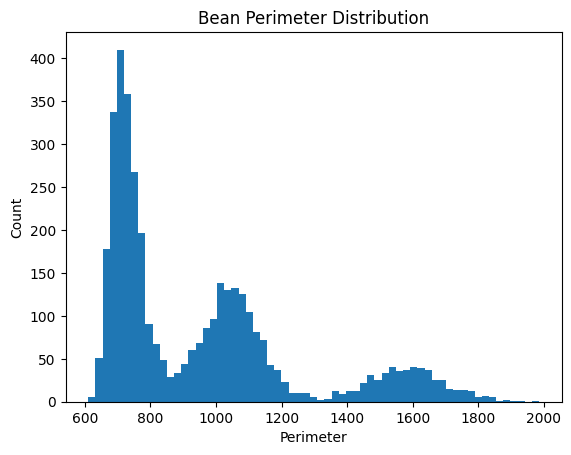

In [235]:
perimeter_distribution.plot.hist(bins=bins, xlabel = "Perimeter", ylabel = "Count", title = "Bean Perimeter Distribution")

Given the previous results for the bean area, the univariate data for the perimeter for the beans is as expected and follows the same patterns and trends established in the area distribution, with the same three sub-distributions of similar variances. This is of no surprise given the relationship between perimeter and area. 

### 2.1.3 Major Axis Length (L) Univariate EDA

The Major Axis Length refers to the vertical length of the bean, given the eliptical shape of the beans, the major axis is much longer than the minor axis length (width) of the bean. 

In [236]:
bean_information["MajorAxisLength"].describe()

count    3870.000000
mean      337.957894
std       118.322426
min       200.524796
25%       248.250966
50%       287.242086
75%       382.902909
max       738.860154
Name: MajorAxisLength, dtype: float64

In [237]:
MajorAL_distribution = bean_information["MajorAxisLength"]
MajorAL_distribution

0       208.178117
1       200.524796
2       212.826130
3       210.557999
4       201.847882
           ...    
3866    715.053040
3867    726.373493
3868    719.125690
3869    738.144502
3870    738.860154
Name: MajorAxisLength, Length: 3870, dtype: float64

<Axes: title={'center': 'Distribution of Major Axis Length'}, xlabel='Major Axis Length', ylabel='Count'>

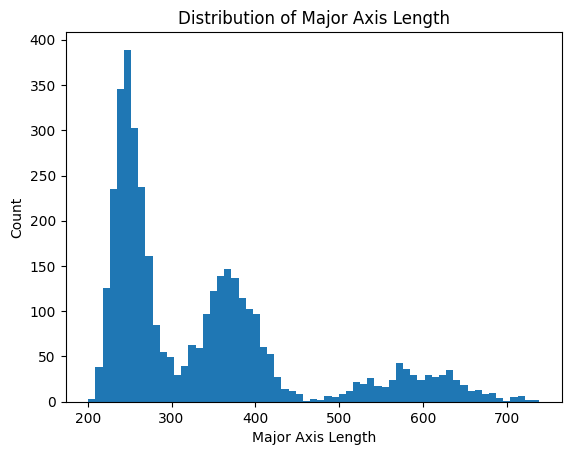

In [238]:
MajorAL_distribution.plot.hist(xlabel = "Major Axis Length", ylabel = "Count",title="Distribution of Major Axis Length", bins = bins)

<Axes: title={'center': 'Major Axis Length Box and Whisker Plot'}>

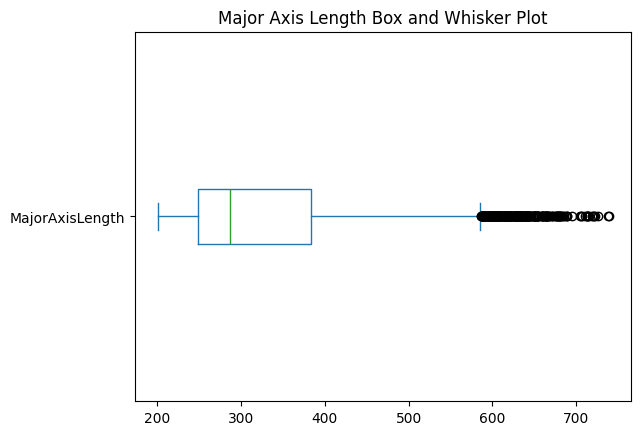

In [239]:
MajorAL_distribution.plot.box(title = "Major Axis Length Box and Whisker Plot", vert = False)

Analysing both the histogram and the box and whisker plot the evidence of clustering is more than obvious, with the histogram highlighting 3-sub distributions of normal distribution structure as established previously, this is further supported with the box and whisker plot, with all outliers being of the third cluster. These are likely due to the target class column as it defines the three groups of beans being investigated. 

### 2.1.4 Minor Axis Length (I) Univariate EDA

The longest line that can be drawn from the bean that can be drawn while standing perpendicular to the main axis

In [240]:
bean_information["MinorAxisLength"].describe()

count    3870.000000
mean      238.291654
std        58.838517
min       171.210559
25%       199.752083
50%       215.801465
75%       248.452833
max       460.198497
Name: MinorAxisLength, dtype: float64

In [241]:
bean_information["MinorAxisLength"].describe()

count    3870.000000
mean      238.291654
std        58.838517
min       171.210559
25%       199.752083
50%       215.801465
75%       248.452833
max       460.198497
Name: MinorAxisLength, dtype: float64

In [242]:
MinorAL_distribution = bean_information["MinorAxisLength"]
MinorAL_distribution

0       173.888747
1       182.734419
2       175.931143
3       182.516516
4       190.279279
           ...    
3866    446.043618
3867    427.370120
3868    450.926187
3869    412.921647
3870    447.418329
Name: MinorAxisLength, Length: 3870, dtype: float64

<Axes: title={'center': 'Minor Axis Length Distribution'}, xlabel='Minor Axis Length', ylabel='Count'>

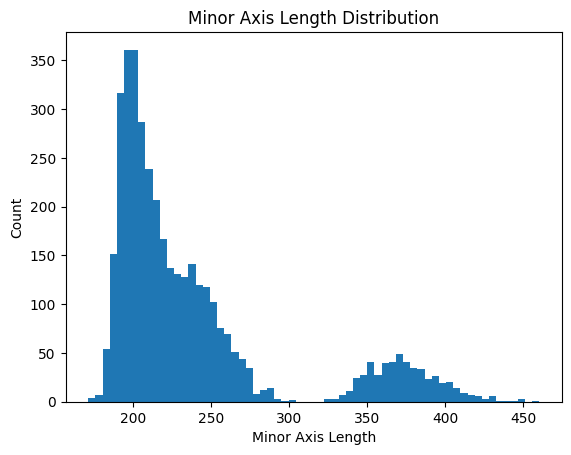

In [243]:
MinorAL_distribution.plot.hist(xlabel="Minor Axis Length", ylabel = "Count", title = "Minor Axis Length Distribution", bins = bins)

Given the heavy tails, we can use a Box and Whisker plot to determine whether there is any clustering occurring.

<Axes: title={'center': 'Minor Axis Length Box and Whisker Plot'}>

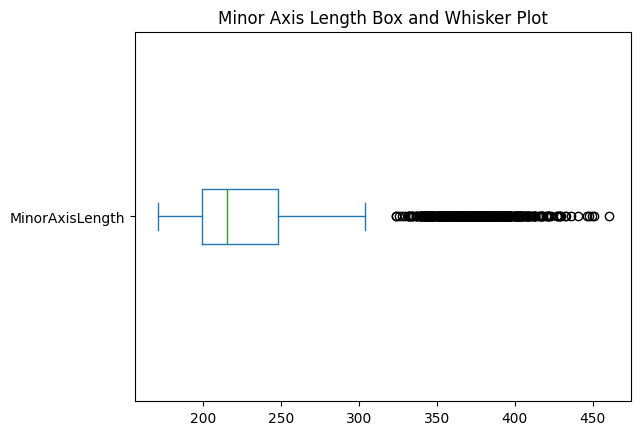

In [244]:
MinorAL_distribution.plot.box(title = "Minor Axis Length Box and Whisker Plot", vert = False)

Given both the histogram and the box and whisker plot, is quite obvious that their are groups or clusters within the set. In the histogram, we can see 3 different almost normal sub-distributions. With the lower 2 being overlapping forming a tight distribution, and the sub-group with high minor axis length having a lower more sperse distribution. This is further supported with the box and whisker plot, with the mean of the plot near the lower range of values, and due to the overlap of the two subgroups, the third cluster were mostly outliers, being well outside the whiskers of the plot. 

### 2.1.5 Aspect Ratio (K) Univariate EDA

Describes the relationship between the Major and Minor Axis Lengths 

In [245]:
bean_information["AspectRation"].describe()

count    3870.000000
mean        1.393235
std         0.187399
min         1.024868
25%         1.231170
50%         1.347181
75%         1.550762
max         1.950371
Name: AspectRation, dtype: float64

In [246]:
AspectRatio_distribution = bean_information["AspectRation"]
AspectRatio_distribution

0       1.197191
1       1.097356
2       1.209713
3       1.153638
4       1.060798
          ...   
3866    1.603101
3867    1.699636
3868    1.594775
3869    1.787614
3870    1.651386
Name: AspectRation, Length: 3870, dtype: float64

Describes the relationship between Major and Minor Axis Length.

<Axes: title={'center': 'Aspect Ratio Distribution'}, ylabel='Frequency'>

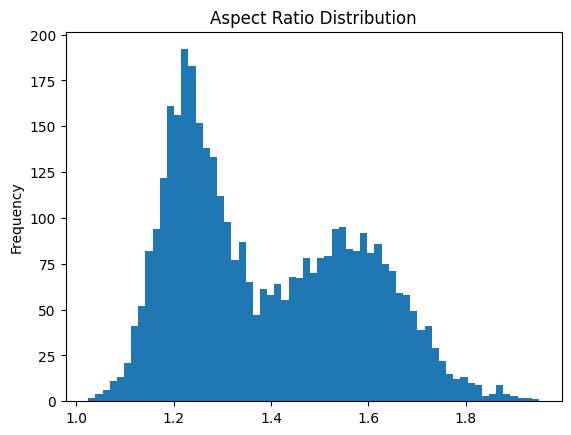

In [247]:
AspectRatio_distribution.plot.hist(title = "Aspect Ratio Distribution", bins = bins)

<Axes: title={'center': 'Aspect Ratio Distribution'}>

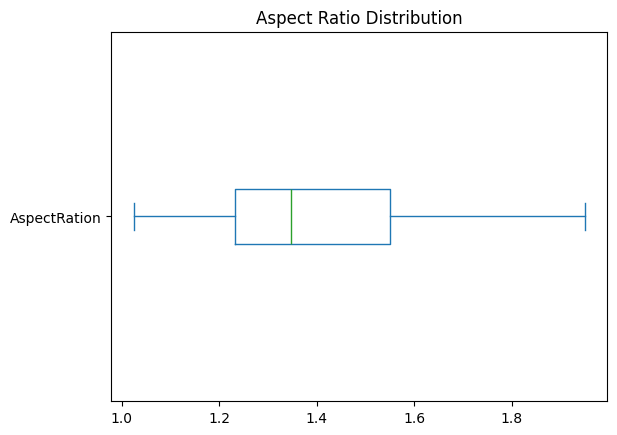

In [248]:
AspectRatio_distribution.plot.box(title = "Aspect Ratio Distribution", vert = False)

Looking at the box and whisker plot, we can infer that the aspect ratio between major and minor axis length is compact, opposed to both the Major and Minor Axis Lengths, which often had outliers outside the box and whiskers. This informs us that despite values that vary considerably, that the variation is proportional, resulting in a stable aspect ratio. As we had hypothesised that the variety in both the major and minor lengths was due to the target column, class; we can conclude that the aspect ratio is decently proportional despite different bean types. 

### 2.1.6 Eccentricity Univariate EDA

The eccentricity of an ellipse that has the same second-order moments as the shape of the bean.

In [249]:
bean_information["Eccentricity"].describe()

count    3870.000000
mean        0.667885
std         0.106543
min         0.218951
25%         0.583329
50%         0.670078
75%         0.764361
max         0.858554
Name: Eccentricity, dtype: float64

In [250]:
Eccentricity_distribution = bean_information["Eccentricity"]
Eccentricity_distribution

0       0.549812
1       0.411785
2       0.562727
3       0.498616
4       0.333680
          ...   
3866    0.781591
3867    0.808598
3868    0.778981
3869    0.828895
3870    0.795806
Name: Eccentricity, Length: 3870, dtype: float64

<Axes: title={'center': 'Eccentricity Distribution'}, xlabel='Eccentricity', ylabel='Count'>

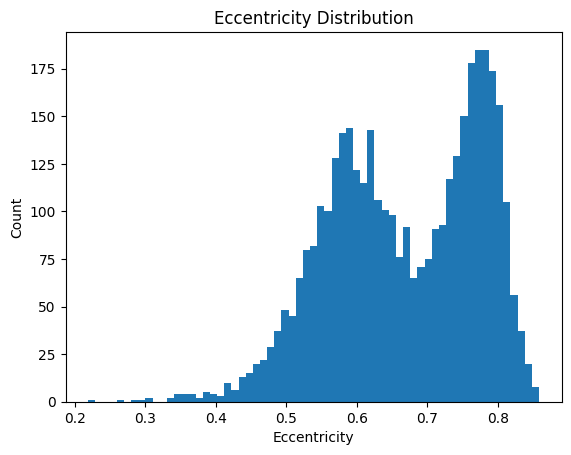

In [251]:
Eccentricity_distribution.plot.hist(xlabel="Eccentricity", ylabel = "Count", title = "Eccentricity Distribution", bins = bins)

Given eccentricity informally refers to how stretched or elongated the bean is in our case; the beans eccentricity distribution appears to be bimodal, with peaks at 0.6 and 0.8, eccentricity values around this area suggest that the beans are moderately elongated, with lower values suggesting they are less elongated or have a closer reflection to a circle, and higher values suggest the bean is extremely elongated. It is difficult to recognise if the varying eccentricity is a result of beans being a different class as their is only two peaks present. 

### 2.1.7 Convex Area Univariate EDA

Convex Area refers to the number of pixels in the smallest convex polygon that can contain the area of the bean seed. 

In [252]:
bean_information["ConvexArea"].describe()

count      3870.000000
mean      69060.937984
std       45810.847952
min       28715.000000
25%       39301.500000
50%       48855.500000
75%       74731.500000
max      263261.000000
Name: ConvexArea, dtype: float64

In [253]:
ConvexArea_distribution = bean_information["ConvexArea"]
ConvexArea_distribution

0        28715.0
1        29172.0
2        29690.0
3        30724.0
4        30417.0
          ...   
3866    251082.0
3867    244319.0
3868    257425.0
3869    240671.0
3870    263261.0
Name: ConvexArea, Length: 3870, dtype: float64

<Axes: title={'center': 'Convex Area Distribution'}, xlabel='Convex Area', ylabel='Count'>

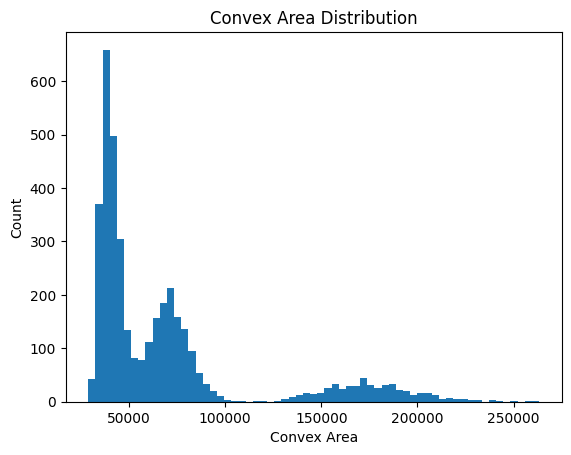

In [254]:
ConvexArea_distribution.plot.hist(xlabel="Convex Area", ylabel = "Count", title = "Convex Area Distribution", bins = bins)

The Convex Area Distribution above appears to follow the same trends as previous analysis, with three-sub distributions likely a product of the three different bean types, all of which varying in deviation. Of course having a quite severe similarity to the area distribution established in 2.1.1

### 2.1.8 Equivelant Diameter Univariate EDA

Equivelant Diameter is the measurement of the diameter of a circle having the same area as the bean.

In [255]:
bean_information["EquivDiameter"].describe()

count    3870.000000
mean      282.552922
std        82.909830
min       190.141097
25%       222.689852
50%       248.203654
75%       305.604369
max       569.374358
Name: EquivDiameter, dtype: float64

In [256]:
EquivelantDiameter_distribution = bean_information["EquivDiameter"]
EquivelantDiameter_distribution

0       190.141097
1       191.272751
2       193.410904
3       195.467062
4       195.896503
           ...    
3866    562.408446
3867    554.311026
3868    565.803115
3869    549.637650
3870    569.374358
Name: EquivDiameter, Length: 3870, dtype: float64

<Axes: title={'center': 'Equivelant Diameter Distribution'}, xlabel='Equivelant Diameter', ylabel='Count'>

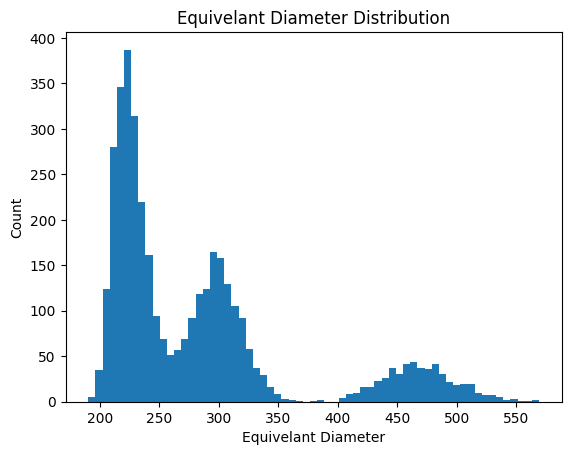

In [257]:
EquivelantDiameter_distribution.plot.hist(xlabel="Equivelant Diameter", ylabel = "Count", title = "Equivelant Diameter Distribution", bins = bins)

As the equivelant diameter is based off of the area of the bean, it is to no surprise we can see again a similar distribution of results as per 2.1.1 and 2.1.7.

### 2.1.9 Extent Univariate EDA

The Extent refers to the ratio of pixels in the bounding box to the bean area.

In [258]:
bean_information["Extent"].describe()

count    3870.000000
mean        0.764681
std         0.032750
min         0.607021
25%         0.748252
50%         0.770735
75%         0.786428
max         0.858420
Name: Extent, dtype: float64

In [259]:
Extent_distribution = bean_information["Extent"]
Extent_distribution

0       0.763923
1       0.783968
2       0.778113
3       0.782681
4       0.773098
          ...   
3866    0.807536
3867    0.820823
3868    0.766776
3869    0.784115
3870    0.783747
Name: Extent, Length: 3870, dtype: float64

<Axes: title={'center': 'Extent Distribution'}, ylabel='Frequency'>

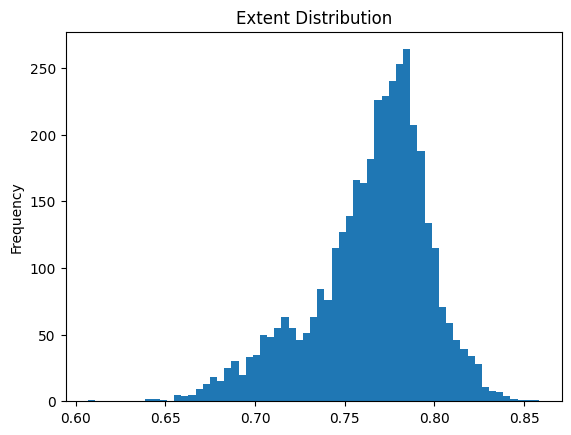

In [260]:
Extent_distribution.plot.hist(title = "Extent Distribution", bins = bins)

Interestingly, the distribution of the extent of the beans is almost normally distributed, and given the differing distributions of area, aspect ratio, and eccentricity is fascinating.

### 2.1.10 Solidity Univariate EDA

Solidity, also referred to as convexity, is the ratio of pixels in the convex shell to those found in the beans. 

In [261]:
bean_information["Solidity"].describe()

count    3870.000000
mean        0.987314
std         0.005061
min         0.919246
25%         0.984173
50%         0.989005
75%         0.991198
max         0.994677
Name: Solidity, dtype: float64

Given this description we can see that for the most part, the solidity of the beans is quite compact, however we do have a min value that is well off the mean as well as Q1. If we calculate the amount of standard deviations from the mean this measurement is, we can determine whether deaming it an outlier and inconsistent to the rest of the dataset as a necessary precaution. 

In [262]:
# Calculations

minimum = 0.919246
std = 0.005061
mean = 0.987314


z_score = ((mean-minimum)/std)
print(z_score)

13.449515905947443


In [263]:
# To compare lets calculate the z score of the maximum

maximum = 0.994677
mean = 0.987314
std = 0.005061

z_score = ((maximum-mean)/std)
print(z_score)

1.4548508199960497


As we can obviously tell this is a huge disparity in the values, even given the fact that values max out at 1.00, to account for this we will delete any entries that are 4 standard deviations from the existing mean. 

In [264]:
# Deleting rows with Solidity less than 4 standard deviations below the mean.

threshold = mean - 4*std

bean_information = bean_information[bean_information["Solidity"] >= threshold]

print("The amount of beans underneath the Solidity threshold was 9 entries")

The amount of beans underneath the Solidity threshold was 9 entries


In [265]:
Solidity_distribution = bean_information["Solidity"]
Solidity_distribution

0       0.988856
1       0.984986
2       0.989559
3       0.976696
4       0.990893
          ...   
3866    0.989414
3867    0.987733
3868    0.976719
3869    0.985869
3870    0.967162
Name: Solidity, Length: 3861, dtype: float64

<Axes: title={'center': 'Solidity Distribution'}, ylabel='Frequency'>

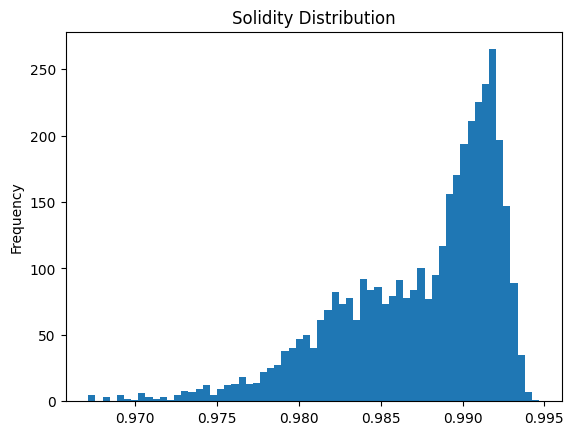

In [266]:
Solidity_distribution.plot.hist(title = "Solidity Distribution", bins = bins)

<Axes: title={'center': 'Solidity Box and Whisker Plot'}>

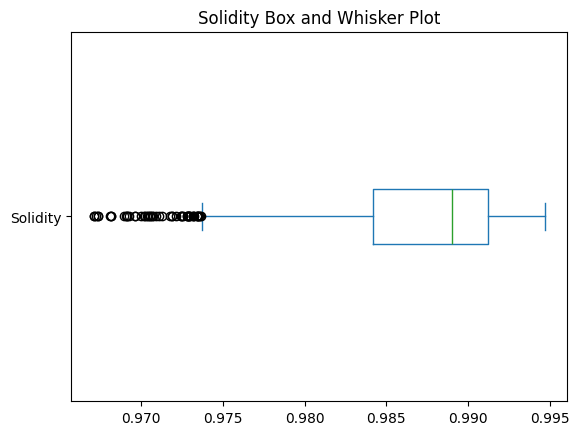

In [267]:
Solidity_distribution.plot.box(title = "Solidity Box and Whisker Plot", vert = False)

The solidity distribution follows a half-normal distribution structure. Even after accounting for outliers far beyond acceptable amounts, this indicates that although the beans have high solidity, it is not without variance, with a high number still lying outside the whiskers of the plot. 

### 2.1.11 Roundness Univariate EDA

Roundness as the name would suggest refers to how round the beans are, and is calculated with both the Area and the Perimeter of the bean. 

In [268]:
bean_information["roundness"].describe()

count            3861
unique           3861
top       0.811731958
freq                1
Name: roundness, dtype: object

As determined at the described roundness column, we can see that the values have been assigned as an object type. The issue with this is that analysis with object data types is different than with numeric types, and since the values in this column are floats, the correct analysis isn't achievable. 

In [269]:
bean_information["roundness"] = bean_information["roundness"].astype(float)
bean_information["roundness"].describe()

count    3861.000000
mean        0.884741
std         0.075928
min         0.593708
25%         0.825716
50%         0.903150
75%         0.952538
max         0.990685
Name: roundness, dtype: float64

After making this change we can see that the data is now in the correct format to perform effective analysis. 

In [270]:
Round_distribution = bean_information["roundness"]
Round_distribution

0       0.958027
1       0.887034
2       0.947849
3       0.903936
4       0.984877
          ...   
3866    0.878992
3867    0.843641
3868    0.857211
3869    0.807399
3870    0.811732
Name: roundness, Length: 3861, dtype: float64

<Axes: title={'center': 'Roundness Distribution'}, xlabel='Roundness', ylabel='Count'>

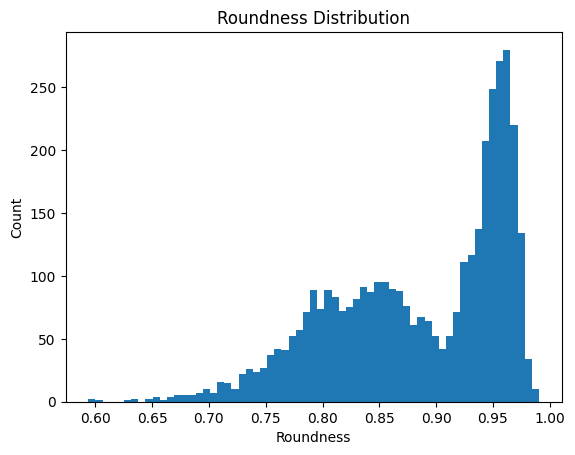

In [271]:
Round_distribution.plot.hist(xlabel = "Roundness", ylabel = "Count", title = "Roundness Distribution", bins = bins)

The distribution of the roundness of the beans follows a bimodal distribution with a lower more deviated peak localised at 0.85 and a narrow more compact peak situated around 0.95, a possible reason for this could be two of the three beans having similar roundness while the other has a higher roundness, however given this is only a univariate analysis, we cannot tell. 

### 2.1.12 Compactness Univariate EDA

Compactness is a calculation of the Equivelant Diameter divided by the Major Axis Length. 

In [272]:
bean_information["Compactness"].describe()

count    3861.000000
mean        0.851501
std         0.056739
min         0.713613
25%         0.801108
50%         0.859914
75%         0.900456
max         0.987303
Name: Compactness, dtype: float64

In [273]:
Compactness_distribution = bean_information["Compactness"]
Compactness_distribution

0       0.913358
1       0.953861
2       0.908774
3       0.928329
4       0.970516
          ...   
3866    0.786527
3867    0.763121
3868    0.786793
3869    0.744621
3870    0.770612
Name: Compactness, Length: 3861, dtype: float64

<Axes: title={'center': 'Compactness Distribution'}, ylabel='Frequency'>

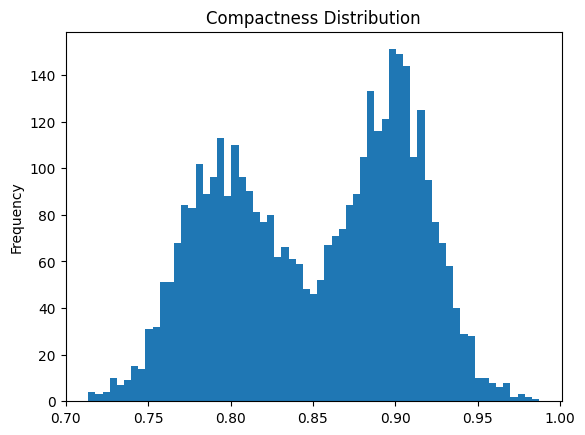

In [274]:
Compactness_distribution.plot.hist(title = "Compactness Distribution", bins = bins)

The Compactness distribution follows a bimodal distribution, with both peaks being of similar deviation, however the peak centralised at 0.90 having more entries. 

### 2.1.13 Shape Factor 1 Univariate EDA

In [275]:
bean_information["ShapeFactor1"].describe()

count    3861.000000
mean        0.005612
std         0.001029
min         0.002778
25%         0.005155
50%         0.005914
75%         0.006386
max         0.007474
Name: ShapeFactor1, dtype: float64

In [276]:
SF1_distribution = bean_information["ShapeFactor1"]
SF1_distribution

0       0.007332
1       0.006979
2       0.007244
3       0.007017
4       0.006697
          ...   
3866    0.002878
3867    0.003010
3868    0.002860
3869    0.003111
3870    0.002902
Name: ShapeFactor1, Length: 3861, dtype: float64

<Axes: title={'center': 'Shape Factor 1 Distribution'}, ylabel='Frequency'>

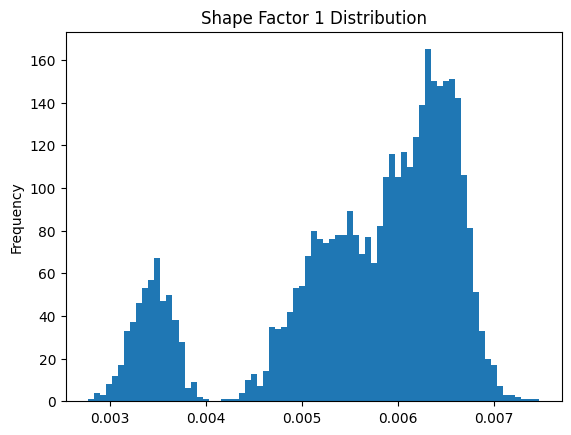

In [277]:
SF1_distribution.plot.hist(title = "Shape Factor 1 Distribution", bins = 75)

Shape Factor 1 consists of three sub-distributions that each appear approximately normal. Two of these sub-distributions are close together, forming a merged transition, which is likely due to the presence of the three different bean classes.

### 2.1.14 Shape Factor 2 Univariate EDA

In [278]:
bean_information["ShapeFactor2"].describe()

count    3861.000000
mean        0.001922
std         0.000725
min         0.000564
25%         0.001301
50%         0.002010
75%         0.002560
max         0.003665
Name: ShapeFactor2, dtype: float64

In [279]:
SF2_distribution = bean_information["ShapeFactor2"]
SF2_distribution

0       0.003147
1       0.003564
2       0.003048
3       0.003215
4       0.003665
          ...   
3866    0.000679
3867    0.000630
3868    0.000676
3869    0.000590
3870    0.000631
Name: ShapeFactor2, Length: 3861, dtype: float64

<Axes: title={'center': 'Shape Factor 2 Distribution'}, ylabel='Frequency'>

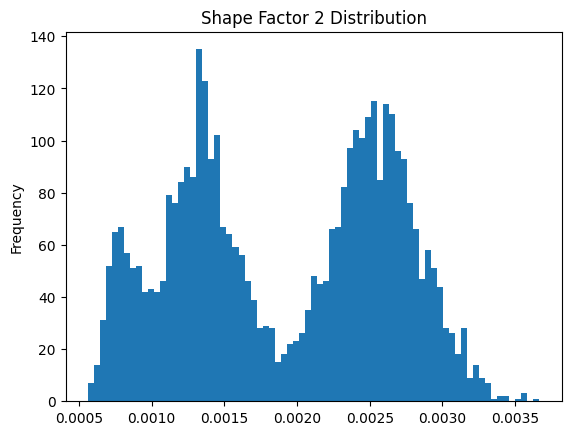

In [280]:
SF2_distribution.plot.hist(title = "Shape Factor 2 Distribution", bins = 75)

Shape Factor 2 follows a bimodal distribution with similar variance. 

### 2.1.15 Shape Factor 3 Univariate EDA

In [281]:
bean_information["ShapeFactor3"].describe()

count    3861.000000
mean        0.728326
std         0.096146
min         0.509244
25%         0.641804
50%         0.739524
75%         0.810820
max         0.974767
Name: ShapeFactor3, dtype: float64

In [282]:
SF3_distribution = bean_information["ShapeFactor3"]
SF3_distribution

0       0.834222
1       0.909851
2       0.825871
3       0.861794
4       0.941900
          ...   
3866    0.618625
3867    0.582354
3868    0.619043
3869    0.554460
3870    0.593843
Name: ShapeFactor3, Length: 3861, dtype: float64

<Axes: title={'center': 'Shape Factor 3 Distribution'}, ylabel='Frequency'>

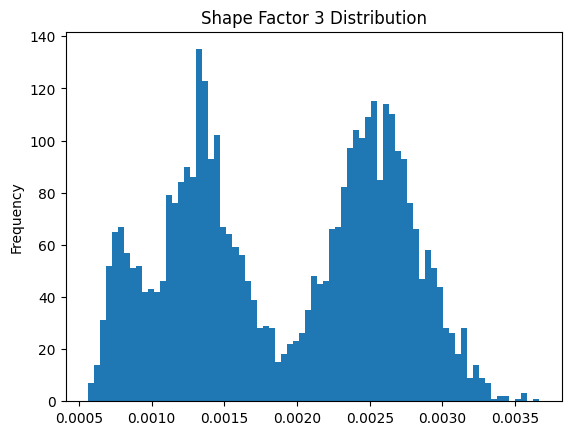

In [283]:
SF2_distribution.plot.hist(title = "Shape Factor 3 Distribution", bins = 75)

The distirbution of Shape Factor 3 is bimodal with localisation centred around 0.00125 and 0.0025, it is hard to tell the reasoning behind this distribution due to the ambiguous nature of Shape Factor 3. 

### 2.1.16 Shape Factor 4 Univariate EDA

In [284]:
bean_information["ShapeFactor4"].describe()

count    3861.000000
mean        0.996642
std         0.003161
min         0.975487
25%         0.995671
50%         0.997790
75%         0.998718
max         0.999733
Name: ShapeFactor4, dtype: float64

In [285]:
SF4_distribution = bean_information["ShapeFactor4"]
SF4_distribution

0       0.998724
1       0.998430
2       0.999066
3       0.994199
4       0.999166
          ...   
3866    0.991718
3867    0.989790
3868    0.987235
3869    0.991160
3870    0.980663
Name: ShapeFactor4, Length: 3861, dtype: float64

<Axes: title={'center': 'Shape Factor 4 Distribution'}, ylabel='Frequency'>

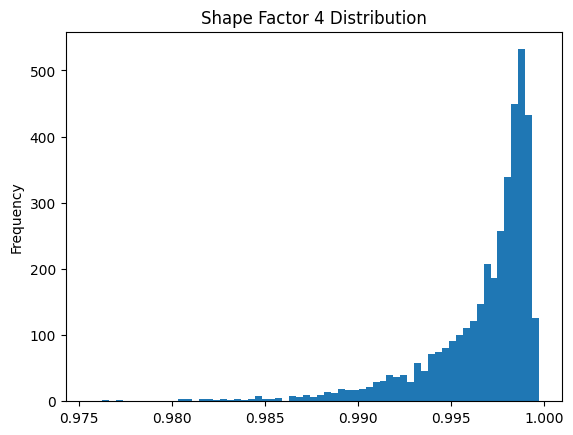

In [286]:
SF4_distribution.plot.hist(title = "Shape Factor 4 Distribution", bins = 65)

Shape Factor 4 follows a half-normal distirbution pictured above in the histogram.

### 2.1.17 Class Univariate EDA

In [287]:
bean_information["Class"].describe()

count      3861
unique        3
top       SEKER
freq       2023
Name: Class, dtype: object

Unlike the previous characteristics of the beans, class refers to the type of bean, in this case we have 3 different types of beans.

In [288]:
Class_distribution = bean_information["Class"]
Class_distribution

0        SEKER
1        SEKER
2        SEKER
3        SEKER
4        SEKER
         ...  
3866    BOMBAY
3867    BOMBAY
3868    BOMBAY
3869    BOMBAY
3870    BOMBAY
Name: Class, Length: 3861, dtype: object

<Axes: title={'center': 'Distribution of Class'}, ylabel='proportion'>

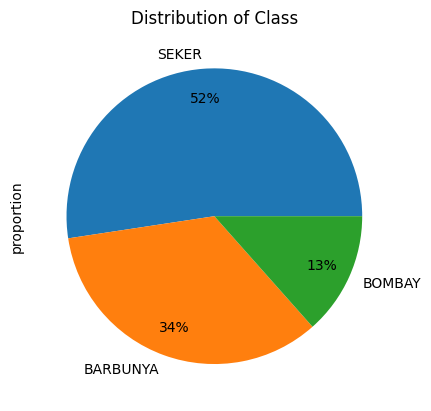

In [289]:
Class_distribution = bean_information["Class"].value_counts(dropna=False, normalize=True)
Class_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Class")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/jupyter/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


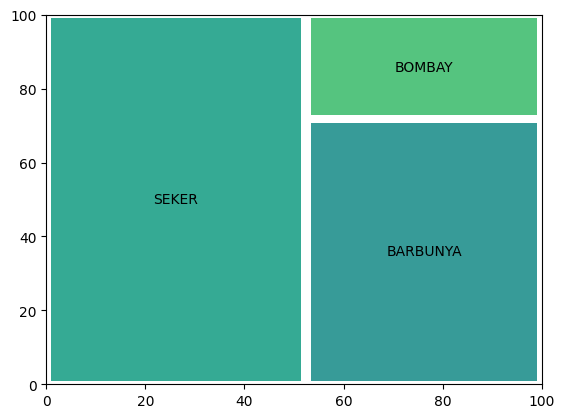

In [427]:
%pip install squarify
import squarify
from matplotlib import pyplot as plt

ax = squarify.plot(sizes=Class_distribution, label = Class_distribution.index, alpha = 0.9, pad=True)

Finally, the last characteristic of the Beans, their class/type is shown to be not be evenly distirbuted, with half of the entries being Seker Beans, while Barbunya and Bombay make up only 34% and 13% of the population respectively. In terms of our previous results its, its hard to tell the effects of class on univariate analysis alone, as we did previously hypothesise that deviations may be due to class, however it is harder to make that assumption when the distribution of class beans is not close to equal. 

## 2.2 Bivariate EDA

Bivariate Exploratory Data Analysis details the relationship between two variables in a dataset; with the goal of understanding patterns and relationships in the data. In this section we will use bivariate EDA to investigate how class effects each numerical attribute of the bean.

Since we will be able to see each classes distribution for the bivariate analysis, it will be easier to identify if any data issues exist.

### 2.2.1 Correlation Among Numerical Data

Reinitialising the Numerical Data as some additional data quality issues were handled in 2.1.

Seen above, it is evident how closely correlated some of the variables are with one another, this comes to no surprise as many of these characteristics measured things that were inherantly related to one another, for example, Area, Perimeter, Major Axis Length, and Minor Axis Length all had a strong positive relationship, this was because these were all measurements of the beans size. In terms of analysis this isn't awfully insightful as that is fairly intuitive.

For our Bivariate EDA, I have chosen to look into the relationship between Bean Class and each numerical variable, as I believe the most detemrining factor of the beans attributes are there class. 

In task 3 we will produce a table containing the mean and standard deviation of each variable given its bean class, before we do this however, we will initilaise our structures so that we can calculate throughout this seciton.

In [291]:
# initialise table dictionary

table = {"Beans": ["Seker", "Barbunya", "Bombay"]}



### 2.2.2 Class and Area

Utilising the matplotlib python library we can create plots that show the distrubution of attributes against a categorical data type, in our case class. To begin with we will be analysing Area. 

<Figure size 800x500 with 0 Axes>

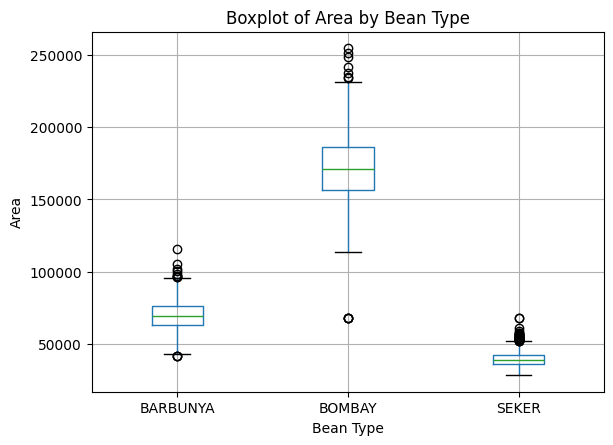

In [292]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bean_information.boxplot(column="Area", by="Class")
plt.title("Boxplot of Area by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Area")
plt.show()


The Boxplot above highlights the variety within the distirbution of area amongst each bean, with all beans having different means and variance, additionally, as a result of increased sampling, it can be seen that a product of the varying sample numbers is also drastly different variations, and it is hard to pinpoint whether this is a characteristic of the beans area, or a result of poor sampling distirbution, this can be visualised to a greater degree, using a violin plot.  

Also, it can be see that their is a major outlier in one of the entries for Bombay beans, with it having a mean that would sit it at around the mean of the Barbunya bean distribution. For this reason, I'll look into whether this bean is a true outlier, or if it has been mislabelled and should instead be a Barbunya or possilbly a Seker Bean.bombay_min = bean_information.loc[bean_information.query("Class == 'Bombay'")["Area"].idxmin()]
print(bombay_min)


In [293]:
bombay_min = bean_information.loc[bean_information.query("Class == 'BOMBAY'")["Area"].idxmin()]
print(bombay_min)


Area                  68042.0
Perimeter            1447.234
MajorAxisLength    537.385706
MinorAxisLength     354.92909
AspectRation         1.393176
Eccentricity         0.750849
ConvexArea           150684.0
EquivDiameter      282.530991
Extent               0.746846
Solidity             0.990357
roundness            0.895347
Compactness          0.811145
ShapeFactor1         0.003601
ShapeFactor2         0.000962
ShapeFactor3         0.657956
ShapeFactor4         0.996188
Class                  BOMBAY
Name: 3407, dtype: object


Now if we compare this to the means of each class below.

In [294]:
class_means = bean_information.groupby("Class").mean()
print(class_means)

                   Area    Perimeter  MajorAxisLength  MinorAxisLength  \
Class                                                                    
BARBUNYA   69773.730099  1045.880247       370.034273       240.290190   
BOMBAY    172707.360308  1584.708657       592.360752       374.268444   
SEKER      39919.736036   727.532249       251.341592       201.923406   

          AspectRation  Eccentricity     ConvexArea  EquivDiameter    Extent  \
Class                                                                          
BARBUNYA      1.544427      0.754698   71015.367703     297.297903  0.749397   
BOMBAY        1.584192      0.770312  175647.005780     468.199393  0.777106   
SEKER         1.245045      0.584679   40269.378151     225.036819  0.771757   

          Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
Class                                                                    
BARBUNYA  0.982847   0.800439     0.804991      0.005358      0.001394   
BOMBAY

If we iterate over each numeric variable, calculate this points difference from the mean, divided by the mean; then we can determine whether or not this point is truly reflective of its respective class. With the lowest sum being the class it is most similar to. 

In [295]:
import numpy as np

numeric_info = ["Area", "Perimeter","MajorAxisLength","MinorAxisLength", "AspectRation","Eccentricity","ConvexArea","EquivDiameter",
                "Extent","Solidity","roundness","Compactness", "ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4"]


differences = {}

for col, row in class_means.iterrows():
    normalized_diff = np.abs(bombay_min[numeric_info] - row) / row
    differences[col] = normalized_diff.sum()

print(differences)

{'BARBUNYA': np.float64(3.4018172644967195), 'BOMBAY': np.float64(1.8515878515761135), 'SEKER': np.float64(8.408554480909917)}


As seen above, despite first assumption that this entry may have been mishandled, we have come to the conclusion that given its other attributes, it displays traits most associated with the Bombay Bean type. 

Now knowing that the data is truly indicative of its bean type, we can use a violin plot to further assist in visualising the different distirbutions amongst the different types of beans. 

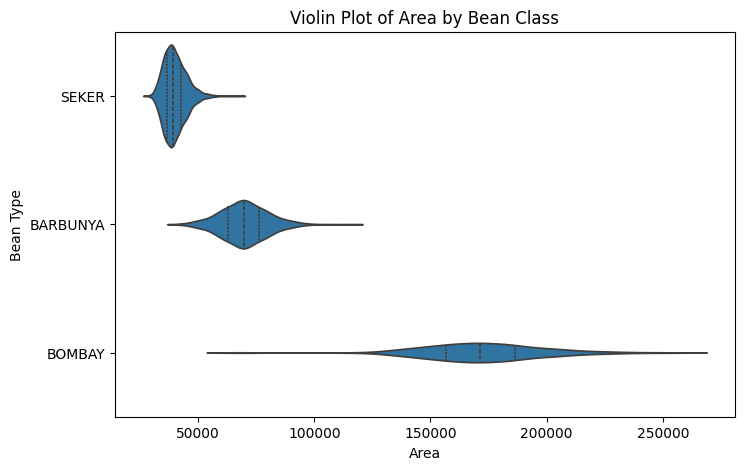

In [296]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sb.violinplot(data=bean_information, x="Area", y="Class", inner="quartile")
plt.title("Violin Plot of Area by Bean Class")
plt.xlabel("Area")
plt.ylabel("Bean Type")
plt.show()


From top to bottom in order of most sampled to least sampled, we can see that the Seker bean has the tightest distribution, followed by Barbunya and finally the Bombay bean. After performing some analysis on an entry that was believed to be hindering the results, it was found that it was truly, most likely to be a Bombay bean, perhaps if more measurements were made, and/or each bean had an equivelant amount of measurements taken, I wonder if the distributions of each beans area would be similar, or would remain the same. 

In [297]:
# Task 3 calculations

Seker_Area_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Area"].mean()

Barbunya_Area_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Area"].mean()

Bombay_Area_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Area"].mean()

Seker_Area_std = bean_information.loc[bean_information["Class"] == "SEKER", "Area"].std()

Barbunya_Area_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Area"].std()

Bombay_Area_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Area"].std()

table["Area Mean"] = [Seker_Area_mean, Barbunya_Area_mean, Bombay_Area_mean]

table["Area Standard Deviation"] = [Seker_Area_std, Barbunya_Area_std, Bombay_Area_std]


### 2.2.3 Class and Perimeter

<Figure size 800x500 with 0 Axes>

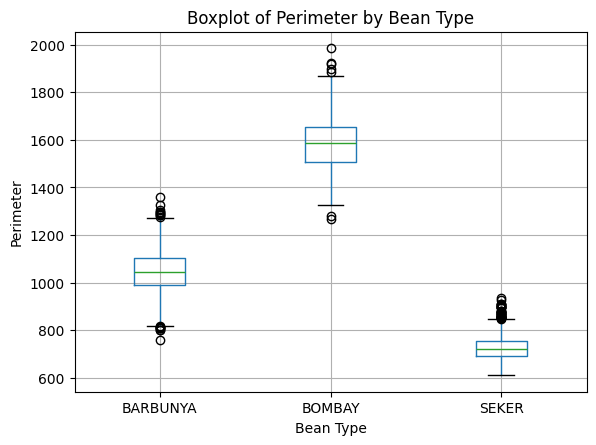

In [298]:
plt.figure(figsize=(8,5))
bean_information.boxplot(column="Perimeter", by="Class")
plt.title("Boxplot of Perimeter by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Perimeter")
plt.show()


The distributions of perimeter compared to area by class are far more similar to each other, although the Seker beans still remain tightly distributed.

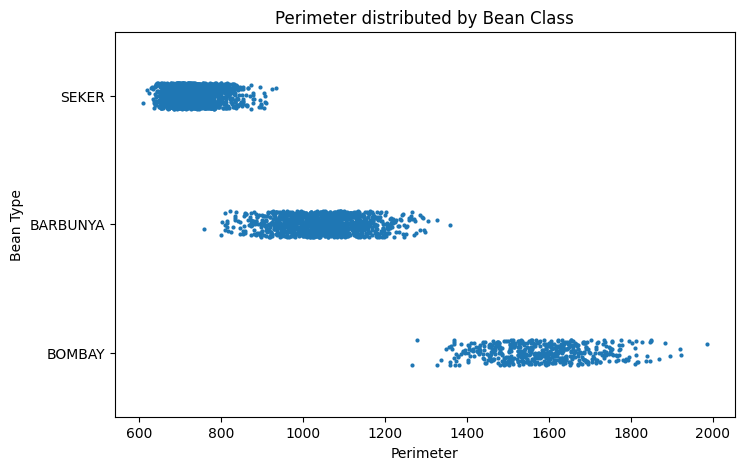

In [299]:
plt.figure(figsize=(8,5))
sb.stripplot(data=bean_information, x='Perimeter', y='Class', size=3)
plt.title('Perimeter distributed by Bean Class')
plt.xlabel('Perimeter')
plt.ylabel('Bean Type')
plt.show()


Utilising a Strip Plot, we can clearly see that the distribution of perimeter is distinct amongst the three types of beans with each having unique ranges and/or variance. With the Seker beans clustered tightly between 600-800, indicating that they have the smallest perimeter on average and the most compact distribution. Barbunya beans had a slightly larger spread between 900-1200 between Seker and Bombay, with this higher range it suggests that it has a slightly higher variability with perimeter. Finally, the Bombay bean centred much higher with a far less compact distribution from 1500-1700 with tails extending pass that on both ends suggesting high variability. What this plot highlights is the clear seperation amongst class given their is slight overlap between groups on edges. 

In [300]:
# Task 3 Calculations

Seker_Perimeter_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Perimeter"].mean()

Barbunya_Perimeter_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Perimeter"].mean()

Bombay_Perimeter_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Perimeter"].mean()

Seker_Perimeter_std = bean_information.loc[bean_information["Class"] == "SEKER", "Perimeter"].std()

Barbunya_Perimeter_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Perimeter"].std()

Bombay_Perimeter_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Perimeter"].std()

table["Perimeter Mean"] = [Seker_Perimeter_mean, Barbunya_Perimeter_mean, Bombay_Perimeter_mean]

table["Perimeter Standard Deviation"] = [Seker_Perimeter_std, Barbunya_Perimeter_std, Bombay_Perimeter_std]

### 2.2.4 Class and Major Axis Length

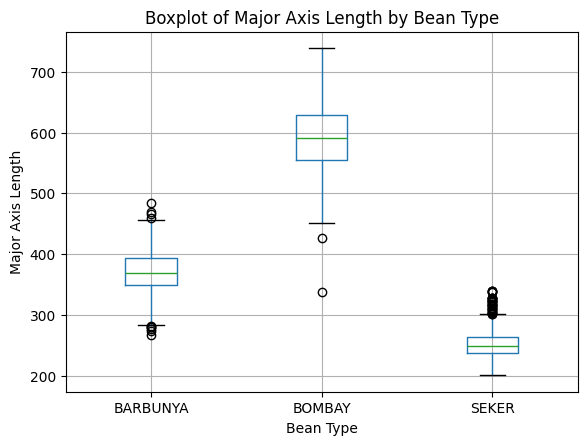

In [301]:
bean_information.boxplot(column="MajorAxisLength", by="Class")
plt.title("Boxplot of Major Axis Length by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Major Axis Length")
plt.show()


Again we can see that another outlier exist in the Bombay Class of Beans, we will utilise the same method to check if this bean exhibits traits more associated with Barbunya or Seker Beans; or whether this outlier is truly a Bombay Bean.Here we have two possible incorrect 

In [428]:
MAL_outlier = bean_information.loc[bean_information.query("Class == 'BOMBAY'")["MajorAxisLength"].idxmin()]
print(MAL_outlier)


Area                 117034.0
Perimeter            1265.926
MajorAxisLength    425.923788
MinorAxisLength    351.215109
AspectRation         1.212715
Eccentricity         0.565722
ConvexArea           118019.0
EquivDiameter      386.021135
Extent               0.746319
Solidity             0.991654
roundness             0.91771
Compactness          0.906315
ShapeFactor1         0.003639
ShapeFactor2         0.001515
ShapeFactor3         0.821407
ShapeFactor4         0.996132
Class                  BOMBAY
Name: 3349, dtype: object


In [429]:
differences = {}

for col, row in class_means.iterrows():
    normalized_diff = np.abs(MAL_outlier[numeric_info] - row) / row
    differences[col] = normalized_diff.sum()

print(differences)

{'BARBUNYA': np.float64(3.8843945299835743), 'BOMBAY': np.float64(3.2708322318224505), 'SEKER': np.float64(7.735323340582687)}


Utilising the normalised difference between all the attributes, the class with the lowest sum will detail which bean this is closely related to. We find that this outlier, in fact, exhibits more traits that would deem it a Barbunya Bean. For this reason, we will reassigns this beans class so that the Bombay Distribution for Major Axis Lengths isnt effected.

In [430]:
idx = bean_information.query("Class == 'BOMBAY'")["MajorAxisLength"].idxmin()

bean_information.loc[idx, "Class"] = "BARBUNYA"

Now that we've dealt with this outlier we can reconfigure the Boxplot for Major Axis Length given Bean type to be the following. 

In [432]:
MAL_Seker_outlier = bean_information.loc[bean_information.query("Class == 'SEKER'")["MajorAxisLength"].idxmax()]
print(MAL_outlier)


Area                 117034.0
Perimeter            1265.926
MajorAxisLength    425.923788
MinorAxisLength    351.215109
AspectRation         1.212715
Eccentricity         0.565722
ConvexArea           118019.0
EquivDiameter      386.021135
Extent               0.746319
Solidity             0.991654
roundness             0.91771
Compactness          0.906315
ShapeFactor1         0.003639
ShapeFactor2         0.001515
ShapeFactor3         0.821407
ShapeFactor4         0.996132
Class                  BOMBAY
Name: 3349, dtype: object


In [433]:
differences = {}

for col, row in class_means.iterrows():
    normalized_diff = np.abs(MAL_Seker_outlier[numeric_info] - row) / row
    differences[col] = normalized_diff.sum()

print(differences)

{'BARBUNYA': np.float64(3.4018172644967195), 'BOMBAY': np.float64(1.8515878515761135), 'SEKER': np.float64(8.408554480909917)}


In [434]:
idx = bean_information.query("Class == 'SEKER'")["MajorAxisLength"].idxmax()

bean_information.loc[idx, "Class"] = "BOMBAY"

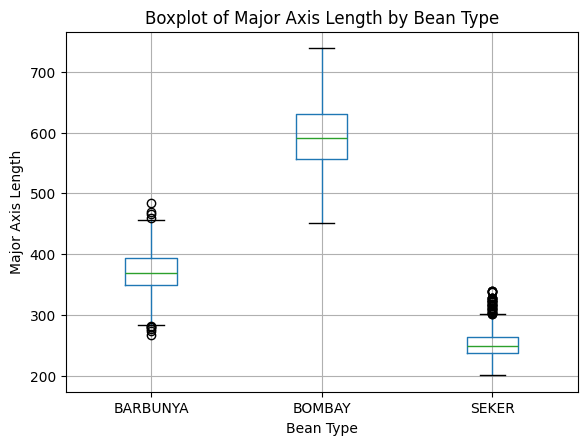

In [435]:
bean_information.boxplot(column="MajorAxisLength", by="Class")
plt.title("Boxplot of Major Axis Length by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Major Axis Length")
plt.show()


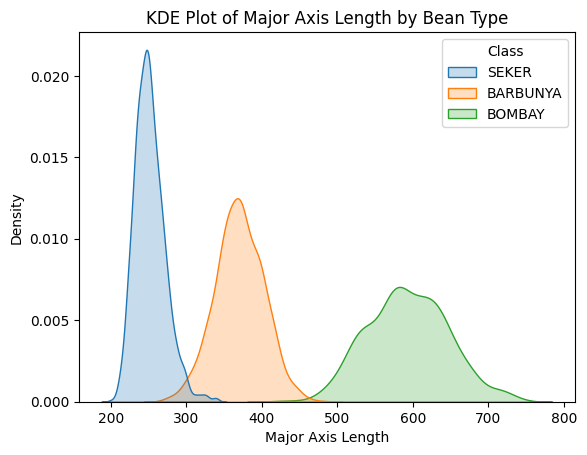

In [306]:
sb.kdeplot(data=bean_information, x="MajorAxisLength", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Major Axis Length by Bean Type")
plt.xlabel("Major Axis Length")
plt.ylabel("Density")
plt.show()


A property of the KDE plot is that it normalises the area under all curves to 1, meaning that peak heights reflect spread and variance, and the amount of beans in each class isn't considered. What the plot above tells us is that consistently, each of the beans have distinct Major Axis Length, with Seker beans having a tight distribution centred at about 250, while Barbunya has a broader peak, yet fairly compact; and finally the bombay beans is not exactly normally distributed like the other two, suggesting that their may be subgroups within this data, or may inherintly be a product of the higher variation in the data, combined with it being measured the least.

In [307]:
# Task 3 Calculations

Seker_MajorAL_mean = bean_information.loc[bean_information["Class"] == "SEKER", "MajorAxisLength"].mean()

Barbunya_MajorAL_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "MajorAxisLength"].mean()

Bombay_MajorAL_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "MajorAxisLength"].mean()

Seker_MajorAL_std = bean_information.loc[bean_information["Class"] == "SEKER", "MajorAxisLength"].std()

Barbunya_MajorAL_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "MajorAxisLength"].std()

Bombay_MajorAL_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "MajorAxisLength"].std()

table["Major Axis Length Mean"] = [Seker_MajorAL_mean, Barbunya_MajorAL_mean, Bombay_MajorAL_mean]

table["Major Axis Length Standard Deviation"] = [Seker_MajorAL_std, Barbunya_MajorAL_std, Bombay_MajorAL_std]

## 2.2.5 Class and Minor Axis Length

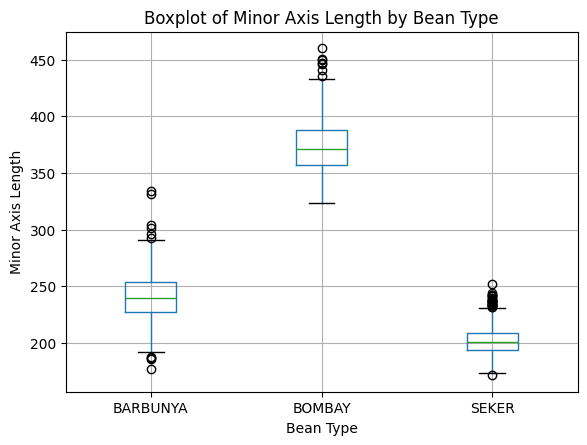

In [308]:
bean_information.boxplot(column="MinorAxisLength", by="Class")
plt.title("Boxplot of Minor Axis Length by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Minor Axis Length")
plt.show()


The Box plot for the Minor Axis Length is quite telling as compared to its Major counterpart, there are some notable differences, including similarities in the range of values in Barbunya Beans and Seker Beans, although the previous variance between the two is consistent thus far. Additionally Bombay is further independant of Barbunya beans, clearly demonstrating that at the minimum, their is a disparity between Bombay Beans as oppossed to Barbunya and Seker. 

Using a KDE plot, we can make a more direct comparison between the relationship between class and minor axis length, and class and major axis length.  

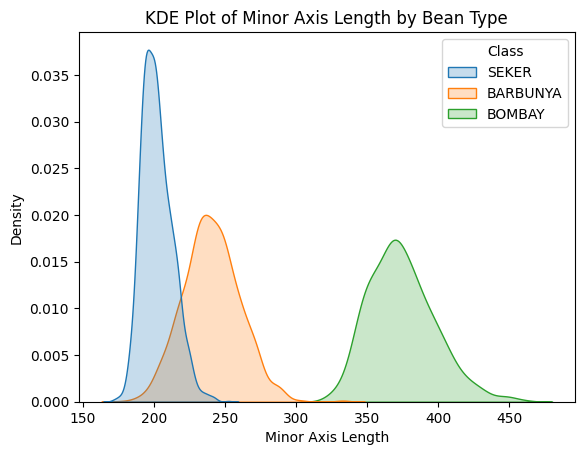

In [309]:
sb.kdeplot(data=bean_information, x="MinorAxisLength", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Minor Axis Length by Bean Type")
plt.xlabel("Minor Axis Length")
plt.ylabel("Density")
plt.show()


The KDE plot highlightes that their is a considerable overlap between Seker and Barbunya Minor Axis Length, located between 175-250, while Bombay is clearly its own distirbution with no asssociation present amongst the other types of beans. With this we can conclude that Minor Axis Length is moderately discriminative, as there was clear seperation with Bombay, Barbunya and Seker have considerable common area.

In [310]:
# Task 3 Calculations

Seker_MinorAL_mean = bean_information.loc[bean_information["Class"] == "SEKER", "MinorAxisLength"].mean()

Barbunya_MinorAL_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "MinorAxisLength"].mean()

Bombay_MinorAL_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "MinorAxisLength"].mean()

Seker_MinorAL_std = bean_information.loc[bean_information["Class"] == "SEKER", "MinorAxisLength"].std()

Barbunya_MinorAL_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "MinorAxisLength"].std()

Bombay_MinorAL_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "MinorAxisLength"].std()

table["Minor Axis Length Mean"] = [Seker_MinorAL_mean, Barbunya_MinorAL_mean, Bombay_MinorAL_mean]

table["Minor Axis Length Standard Deviation"] = [Seker_MinorAL_std, Barbunya_MinorAL_std, Bombay_MinorAL_std]

### 2.2.6 Class and Aspect Ratio

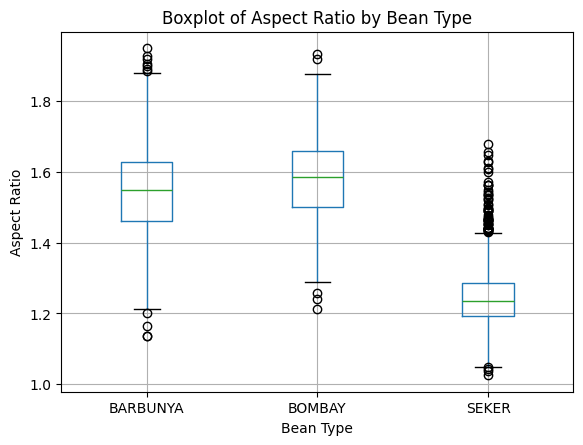

In [311]:
bean_information.boxplot(column="AspectRation", by="Class")
plt.title("Boxplot of Aspect Ratio by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Aspect Ratio")
plt.show()


Both Barbunya and Bombay exhibit similar aspect ratio distributions that are both relatively normal as both medians are close to the middle of their box, although not without outliers outside the IQR. The Seker Aspect Ratio however is very skewed, with the median located at around 1.25, and with the substantial amount of outliers present outside the IQR.

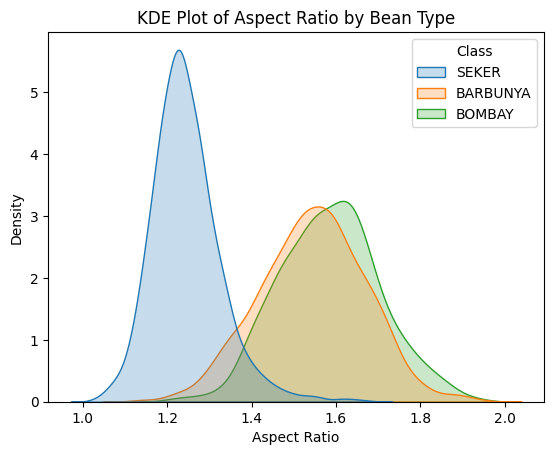

In [312]:
sb.kdeplot(data=bean_information, x="AspectRation", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Aspect Ratio by Bean Type")
plt.xlabel("Aspect Ratio")
plt.ylabel("Density")
plt.show()


The KDE plot confirms our statements from the box plot analysis, showing the similarity in distributions in both Barbunya Bean and Bombay Beans, while the Seker distribution has a tight peak around its median on the box plot, but has a long tail to the right, highlighting its signifficant leftward skew. Demonstrates that aspect ratio is somewhat discriminative, as only Seker beans can be identified if given an aspect ratio. 

In [313]:
# Task 3 Calculations

Seker_AspectRatio_mean = bean_information.loc[bean_information["Class"] == "SEKER", "AspectRation"].mean()

Barbunya_AspectRatio_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "AspectRation"].mean()

Bombay_AspectRatio_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "AspectRation"].mean()

Seker_AspectRatio_std = bean_information.loc[bean_information["Class"] == "SEKER", "AspectRation"].std()

Barbunya_AspectRatio_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "AspectRation"].std()

Bombay_AspectRatio_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "AspectRation"].std()

table["Aspect Ratio Mean"] = [Seker_AspectRatio_mean, Barbunya_AspectRatio_mean, Bombay_AspectRatio_mean]

table["Aspect Ratio Standard Deviation"] = [Seker_AspectRatio_std, Barbunya_AspectRatio_std, Bombay_AspectRatio_std]

### 2.2.7 Class and Eccentricity

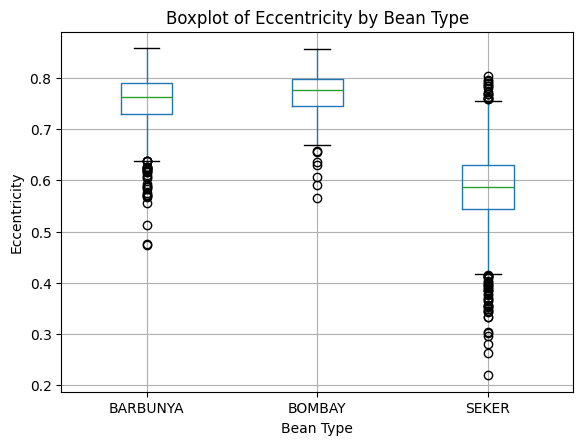

In [314]:
bean_information.boxplot(column="Eccentricity", by="Class")
plt.title("Boxplot of Eccentricity by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Eccentricity")
plt.show()


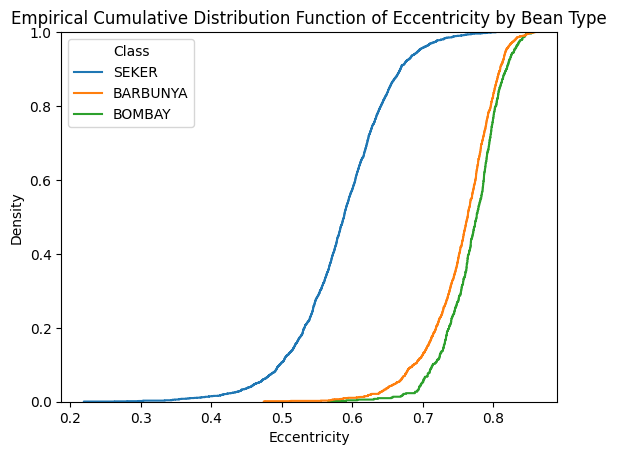

In [315]:
sb.ecdfplot(data=bean_information, x="Eccentricity", hue="Class", stat='proportion', complementary=False)

plt.title("Empirical Cumulative Distribution Function of Eccentricity by Bean Type")
plt.xlabel("Eccentricity")
plt.ylabel("Density")
plt.show()

The Empirical Cumulative Distribution Function above demonstrates the proportion of observations falling below each unique point in a dataset. Here it shows how Barbunya and Bombay not only have similar medians, but also are distributed similaly, with Barbunya having more outliers on its lower end, and Bombay being a slightly tighter distribution, whereas Seker has a wider distribution as the area between 0 and 1 of the curve spans a further distance horizontally, additionally the long incline and decline from 0 and to 1 indicate that the distribution has outliers that sit further away from the median. 

In [316]:
# Task 3 Calculations

Seker_Eccentricity_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Eccentricity"].mean()

Barbunya_Eccentricity_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Eccentricity"].mean()

Bombay_Eccentricity_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Eccentricity"].mean()

Seker_Eccentricity_std = bean_information.loc[bean_information["Class"] == "SEKER", "Eccentricity"].std()

Barbunya_Eccentricity_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Eccentricity"].std()

Bombay_Eccentricity_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Eccentricity"].std()

table["Eccentricity Mean"] = [Seker_Eccentricity_mean, Barbunya_Eccentricity_mean, Bombay_Eccentricity_mean]

table["Eccentricity Standard Deviation"] = [Seker_Eccentricity_std, Barbunya_Eccentricity_std, Bombay_Eccentricity_std]

### 2.2.8 Class and Convex Area

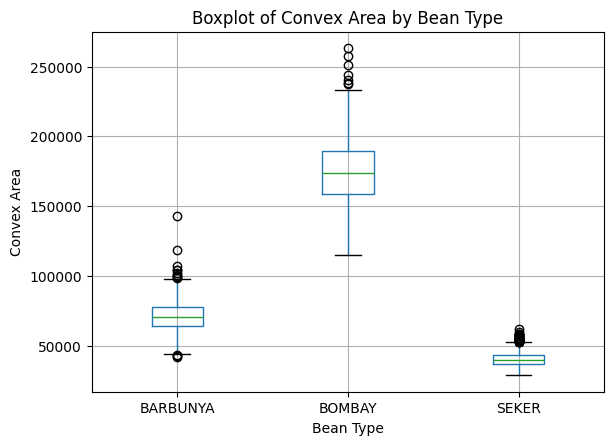

In [317]:
bean_information.boxplot(column="ConvexArea", by="Class")
plt.title("Boxplot of Convex Area by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Convex Area")
plt.show()

Here we can see that the Barbunya Bean with the Highest Convex Area may be wrongly assigned to this group, as it may have fit better in the Bombay group, performing the same analysis as before we can determine which class it fits in most. 

In [318]:
CA_outlier = bean_information.loc[bean_information.query("Class == 'BARBUNYA'")["ConvexArea"].idxmax()]
print(CA_outlier)


Area                  68042.0
Perimeter            1459.686
MajorAxisLength    337.925752
MinorAxisLength    334.166476
AspectRation         1.393176
Eccentricity         0.786138
ConvexArea           143275.0
EquivDiameter      282.530991
Extent                0.76737
Solidity             0.987314
roundness            0.814246
Compactness          0.775441
ShapeFactor1         0.005611
ShapeFactor2         0.001921
ShapeFactor3         0.728143
ShapeFactor4         0.996604
Class                BARBUNYA
Name: 3419, dtype: object


These results do look similar to our Major Axis Length outlier, if we compare lets just confirm whether they are the same or are in fact different beans.

In [319]:
print(MAL_outlier)

Area                  68042.0
Perimeter            1459.686
MajorAxisLength    337.925752
MinorAxisLength    334.166476
AspectRation         1.393176
Eccentricity         0.786138
ConvexArea           143275.0
EquivDiameter      282.530991
Extent                0.76737
Solidity             0.987314
roundness            0.814246
Compactness          0.775441
ShapeFactor1         0.005611
ShapeFactor2         0.001921
ShapeFactor3         0.728143
ShapeFactor4         0.996604
Class                  BOMBAY
Name: 3419, dtype: object


Here despite intial thoughts, this was in fact the same entry from earlier, as we know this bean exhibits Barbunya traits more so then Bombay, we will keep it in its class.

The boxplot of convex area by class above is again similar to the other area and length measurement distirbutions, with Bombay having a considerably larger convex area then the other beans, along with a much higher IQR, but not without its outliers. Barbunya has a slightly more condense distribution, with a median that sits roughly at 7000, and again has outliers outside the whiskers of the box plot. Finally, the Seker has the most condense distribution suggesting that convex area for this bean type does not experience as much variation amongst measurements. 

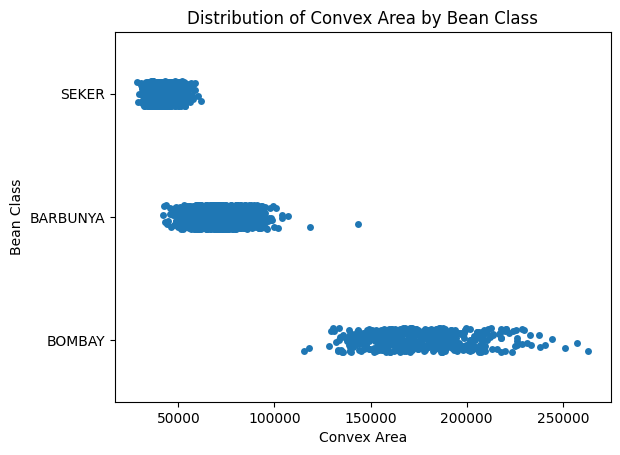

In [320]:
sb.stripplot(data=bean_information, x="ConvexArea", y="Class")
plt.title("Distribution of Convex Area by Bean Class")
plt.xlabel("Convex Area")
plt.ylabel("Bean Class")

plt.show()

Utilising a strip plot, we can see the varying density of the distributions, with Seker having a very compact distribution, evident through the lack of gaps in the group, Barbunya while having a less compact distribution, remains compact apart from the outliers shown on its tails. Bombay easily has the most disperse distribution of the three with gaps within the main cluster and enlongated tails. 

In [321]:
# Task 3 Calculations

Seker_Convex_Area_mean = bean_information.loc[bean_information["Class"] == "SEKER", "ConvexArea"].mean()

Barbunya_Convex_Area_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ConvexArea"].mean()

Bombay_Convex_Area_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "ConvexArea"].mean()

Seker_Convex_Area_std = bean_information.loc[bean_information["Class"] == "SEKER", "ConvexArea"].std()

Barbunya_Convex_Area_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ConvexArea"].std()

Bombay_Convex_Area_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "ConvexArea"].std()

table["Convex Area Mean"] = [Seker_Convex_Area_mean, Barbunya_Convex_Area_mean, Bombay_Convex_Area_mean]

table["Convex Area Standard Deviation"] = [Seker_Convex_Area_std, Barbunya_Convex_Area_std, Bombay_Convex_Area_std]

### 2.2.9 Class and Equivelant Diameter

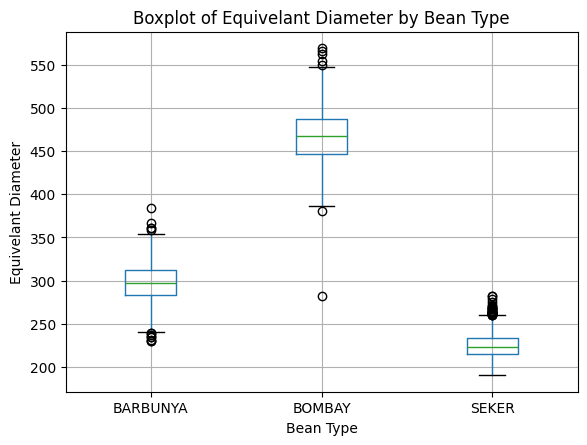

In [322]:
bean_information.boxplot(column="EquivDiameter", by="Class")
plt.title("Boxplot of Equivelant Diameter by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Equivelant Diameter")
plt.show()

Here we can see that we have an entry for Equivelant Diameter which is far beyong the IQR of Bombay Equivelant Diameter, and could be a Barbunya or Seker bean, lets analyse its fit accordingly.

In [323]:
ED_outlier = bean_information.loc[bean_information.query("Class == 'BARBUNYA'")["EquivDiameter"].idxmin()]
print(ED_outlier)


Area                  41487.0
Perimeter               815.9
MajorAxisLength    299.046841
MinorAxisLength     177.08149
AspectRation         1.688753
Eccentricity         0.805826
ConvexArea            42483.0
EquivDiameter      229.832306
Extent               0.689176
Solidity             0.976555
roundness            0.783156
Compactness           0.76855
ShapeFactor1         0.007208
ShapeFactor2         0.001551
ShapeFactor3         0.590668
ShapeFactor4         0.997493
Class                BARBUNYA
Name: 2035, dtype: object


Here we can see that this is in fact not the same bean, we can continue our class check.

In [324]:
differences = {}

for col, row in class_means.iterrows():
    normalized_diff = np.abs(ED_outlier[numeric_info] - row) / row
    differences[col] = normalized_diff.sum()

print(differences)

{'BARBUNYA': np.float64(2.573755978448864), 'BOMBAY': np.float64(5.8854790919758155), 'SEKER': np.float64(2.51465055406079)}


Although this bean would sit around the centre of the Convex Area distirbution for Barbunya beans, class analysis actually confirms that this entry would fit the Seker class more so. With this we can reassign.

In [325]:
idx = bean_information.query("Class == 'BOMBAY'")["EquivDiameter"].idxmin()

bean_information.loc[idx, "Class"] = "SEKER"

Now with this adjustment we can replot.

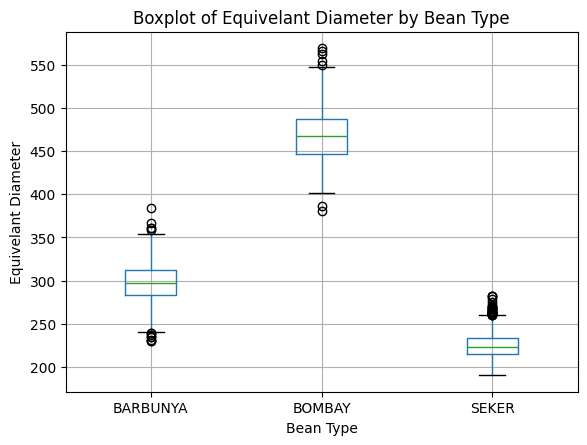

In [326]:
bean_information.boxplot(column="EquivDiameter", by="Class")
plt.title("Boxplot of Equivelant Diameter by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Equivelant Diameter")
plt.show()

The Equivelant Diameter as discussed earlier during the univariate analysis, is the measurement of what diameter a beans respective circle would have to be if said circle had the same area as the bean. Following these changes we find that the IQR for Bombay Equivelant Diameter has reduced, and is more reflective of its true nature. Here we can see the distribution is decently similar to the distribution between class and area from earlier, however the variance within classes is different. Utilising a violin plot, we can get a better visualisation of how Equivelant Diameter compares to Area when considering Bean Class.

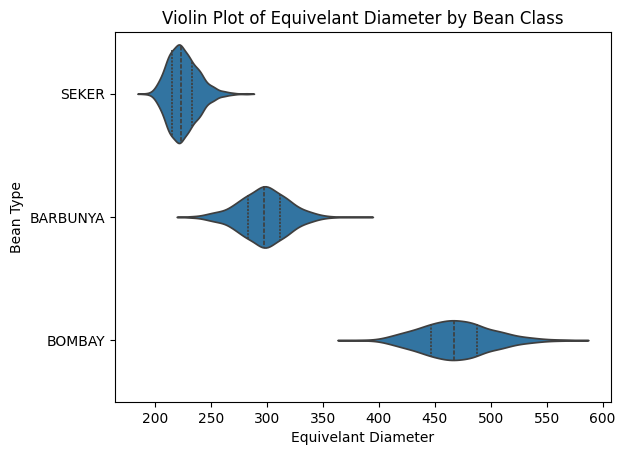

In [327]:
sb.violinplot(data=bean_information, x="EquivDiameter", y="Class", inner="quartile")
plt.title("Violin Plot of Equivelant Diameter by Bean Class")
plt.xlabel("Equivelant Diameter")
plt.ylabel("Bean Type")
plt.show()


The Equivelant Diameter measurement is derived from the actual area of the bean; and because of this, it was expected that results would be similar to the plots between class and area. As evident above this hypothesis is correct although the equivelant area does possess a few subtle differences. Here we can see that Seker beans have a tight distribution with a median sitting at approximitely 225, Barbunya Beans are less condense in their distribution, with a median of roughly 300 and a normal distribution, there is some overlap between both Seker and Bombay for this class. Bombay, like Area, has a wide distribution with long tails, highlighting outliers within data. With the median sitting at roughly 470. Although there is some overlap between the class', they remain highly discriminative, as it is more than clear that there is seperation amongst the groups when measuring equivelant diameter. 

In [328]:
# Task 3 Calculations

Seker_Equivelant_Diameter_mean = bean_information.loc[bean_information["Class"] == "SEKER", "EquivDiameter"].mean()

Barbunya_Equivelant_Diameter_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "EquivDiameter"].mean()

Bombay_Equivelant_Diameter_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "EquivDiameter"].mean()

Seker_Equivelant_Diameter_std = bean_information.loc[bean_information["Class"] == "SEKER", "EquivDiameter"].std()

Barbunya_Equivelant_Diameter_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "EquivDiameter"].std()

Bombay_Equivelant_Diameter_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "EquivDiameter"].std()

table["Equivelant Diameter Mean"] = [Seker_Equivelant_Diameter_mean, Barbunya_Equivelant_Diameter_mean, Bombay_Equivelant_Diameter_mean]

table["Equivelant Diameter Standard Deviation"] = [Seker_Equivelant_Diameter_std, Barbunya_Equivelant_Diameter_std, Bombay_Equivelant_Diameter_std]

### 2.2.10 Class and Extent

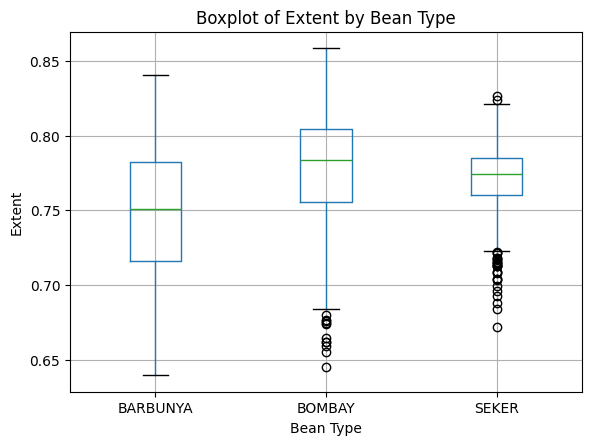

In [329]:
bean_information.boxplot(column="Extent", by="Class")
plt.title("Boxplot of Extent by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Extent")
plt.show()

The Extent property measures the ratio of pixels in the bounding box as opposed to the Bean area. Here we can see that all beans have similar medians all sitting approx. between 0.75-0.78, however all with unique distributions. With Seker and Bombay Beans having a left skew in their distributions, with a large amount of entries sitting outside the IQR; with Bombay having a more generous IQR, suggesting a less condense distribution. The Barbunya extent distribution however is almost completely normal in distribution with no outliers, and a generous IQR. Using a KDE plot we can visualise the distributions as well as the similarities in each of their results. 

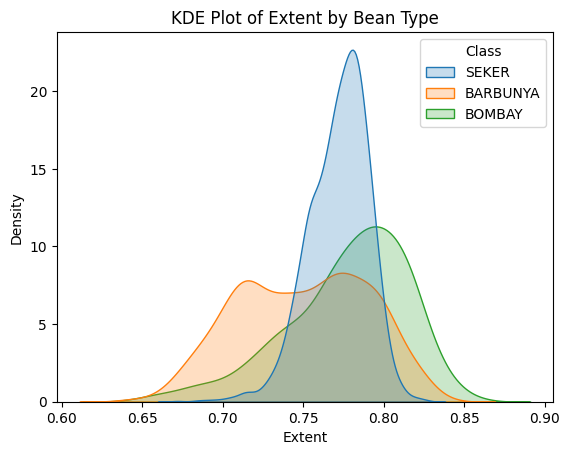

In [330]:
sb.kdeplot(data=bean_information, x="Extent", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Extent by Bean Type")
plt.xlabel("Extent")
plt.ylabel("Density")
plt.show()


Interestingly, when plotting with a KDE plot we find that some of the observations made from the box and whisker plot weren't necessarily the case, especially with the Barbunya distirbution being normal, where here it is clear that is truly a bimodal, with peaks approx. at 0.71 and 0.78, this explains why the median was located around 0.75. KDE plot does show how the Bombay and Seker plots are skewed to the left; with most data concentrated at 0.78 for Seker and 0.8 for Bombay, however with the large amount of outliers the median is closer to the values outside the IQR. For Extent, class is shown to not be discriminitive as their is considerable overlap within values and it is difficult to distinguish values from each other as a result. 

In [331]:
# Task 3 Calculations

Seker_Extent_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Extent"].mean()

Barbunya_Extent_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Extent"].mean()

Bombay_Extent_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Extent"].mean()

Seker_Extent_std = bean_information.loc[bean_information["Class"] == "SEKER", "Extent"].std()

Barbunya_Extent_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Extent"].std()

Bombay_Extent_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Extent"].std()

table["Extent Mean"] = [Seker_Extent_mean, Barbunya_Extent_mean, Bombay_Extent_mean]

table["Extent Standard Deviation"] = [Seker_Extent_std, Barbunya_Extent_std, Bombay_Extent_std]

### 2.2.11 Class and Solidity

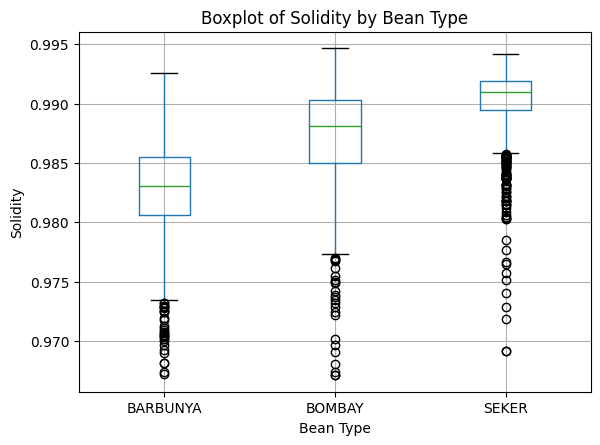

In [332]:
bean_information.boxplot(column="Solidity", by="Class")
plt.title("Boxplot of Solidity by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Solidity")
plt.show()

The solidity or convexity of the beans like extent, has all beans having somewhat similar means, all sitting within 0.01 of one another, and with each having distributions with severe left skews. The variance from left to right above also show the difference in variance amongst the beans, with the IQR decreasing from Barbunya to Bombay and finally being tightly condensed for Seker. 

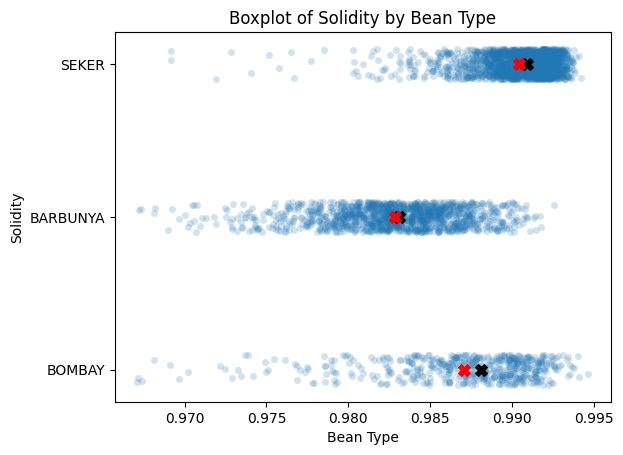

In [333]:
sb.stripplot(data=bean_information, x="Solidity", y="Class", dodge=True, alpha=.2, legend=False)

Seker_median = bean_information.loc[bean_information["Class"] == "SEKER", "Solidity"].median()
Seker_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Solidity"].mean()
Seker_y = list(bean_information["Class"].unique()).index("SEKER")

Barbunya_median = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Solidity"].median()
Barbunya_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Solidity"].mean()
Barbunya_y = list(bean_information["Class"].unique()).index("BARBUNYA")

Bombay_median = bean_information.loc[bean_information["Class"] == "BOMBAY", "Solidity"].median()
Bombay_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Solidity"].mean()
Bombay_y = list(bean_information["Class"].unique()).index("BOMBAY")

plt.scatter(Seker_median, Seker_y, color="black", marker="X", s=70, zorder=3)
plt.scatter(Seker_mean, Seker_y, color="red", marker="X", s=70, zorder=3)
plt.scatter(Barbunya_median, Barbunya_y, color="black", marker="X", s=70, zorder=3)
plt.scatter(Barbunya_mean, Barbunya_y, color="red", marker="X", s=70, zorder=3)
plt.scatter(Bombay_median, Bombay_y, color="black", marker="X", s=70, zorder=3)
plt.scatter(Bombay_mean, Bombay_y, color="red", marker="X", s=70, zorder=3)


plt.title("Boxplot of Solidity by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Solidity")
plt.show()

The striplot above shows the distributions of Solidity given class, additionally black markers have been included which showcase the median for each respective plot, as well as, red markers for the mean of each respective plot. As hypothesised from the Box plot, all three distributions are skewed to the left, this is evident as the mean for all three classes are less than the median. Class for Solidity is not very discriminative due to the overlap between the classes. 

In [334]:
# Task 3 Calculations

Seker_Solidity_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Solidity"].mean()

Barbunya_Solidity_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Solidity"].mean()

Bombay_Solidity_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Solidity"].mean()

Seker_Solidity_std = bean_information.loc[bean_information["Class"] == "SEKER", "Solidity"].std()

Barbunya_Solidity_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Solidity"].std()

Bombay_Solidity_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Solidity"].std()

table["Solidity Mean"] = [Seker_Solidity_mean, Barbunya_Solidity_mean, Bombay_Solidity_mean]

table["Solidity Standard Deviation"] = [Seker_Solidity_std, Barbunya_Solidity_std, Bombay_Solidity_std]

### 2.2.12 Class and Roundness

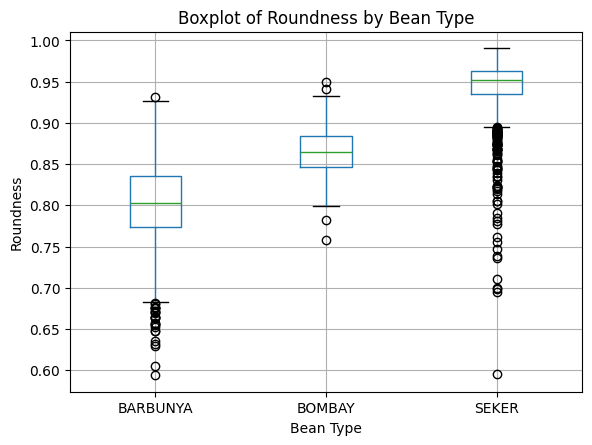

In [335]:
bean_information.boxplot(column="roundness", by="Class")
plt.title("Boxplot of Roundness by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Roundness")
plt.show()

The lowest entry for the Seker Roundness trait appears to be an outlier based on its distance from the rest of the entries in its class, performing class analysis we can determine whether it would fit better in another class.

In [336]:
roundness_outlier = bean_information.loc[bean_information.query("Class == 'SEKER'")["roundness"].idxmin()]
print(roundness_outlier)


Area                  40580.0
Perimeter             925.731
MajorAxisLength    259.091514
MinorAxisLength    200.518536
AspectRation         1.292108
Eccentricity         0.633272
ConvexArea            41753.0
EquivDiameter      227.306095
Extent               0.751259
Solidity             0.971906
roundness            0.595048
Compactness           0.87732
ShapeFactor1         0.006385
ShapeFactor2         0.002333
ShapeFactor3          0.76969
ShapeFactor4         0.994522
Class                   SEKER
Name: 1233, dtype: object


In [337]:
differences = {}

for col, row in class_means.iterrows():
    normalized_diff = np.abs(roundness_outlier[numeric_info] - row) / row
    differences[col] = normalized_diff.sum()

print(differences)

{'BARBUNYA': np.float64(3.382843640794723), 'BOMBAY': np.float64(7.145309752704089), 'SEKER': np.float64(1.0697844065569535)}


Despite initial assumptions, this bean clearly demonstrates SEKER qualities with a normalised differences sum of 1.07 as compared to Barbunya with 3.38 and Bombay with 7.15.

Box plot above shows signifficant left skew for the Barbunya and Seker Beans whereas the Bombay bean has a reasonably even distribution of roundness. Variance increases from left to right as the IQR shrinks from Barbunya, to Bombay to Seker. 

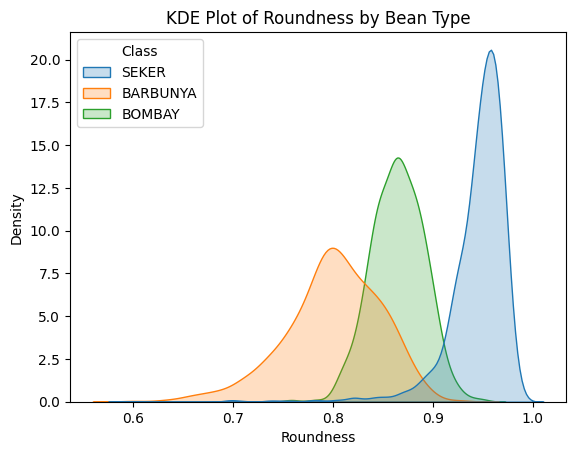

In [338]:
sb.kdeplot(data=bean_information, x="roundness", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Roundness by Bean Type")
plt.xlabel("Roundness")
plt.ylabel("Density")
plt.show()


As noted in the box plot analysis, the Bombay bean roundnes distribution is shown to be normal, with even distribution to either side of its peak. Whereas Seker and Barbunya have visible left tails, further emphasising the skew of their respective distirbutions. The class of is moderately discriminative for roundness, as althought their is seperation, there is still considerable overlap especially between Bombay and Barbunya beans. 

In [339]:
# Task 3 Calculations

Seker_Roundness_mean = bean_information.loc[bean_information["Class"] == "SEKER", "roundness"].mean()

Barbunya_Roundness_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "roundness"].mean()

Bombay_Roundness_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "roundness"].mean()

Seker_Roundness_std = bean_information.loc[bean_information["Class"] == "SEKER", "roundness"].std()

Barbunya_Roundness_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "roundness"].std()

Bombay_Roundness_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "roundness"].std()

table["Roundness Mean"] = [Seker_Roundness_mean, Barbunya_Roundness_mean, Bombay_Roundness_mean]

table["Roundness Standard Deviation"] = [Seker_Roundness_std, Barbunya_Roundness_std, Bombay_Roundness_std]

### 2.2.13 Class and Compactness

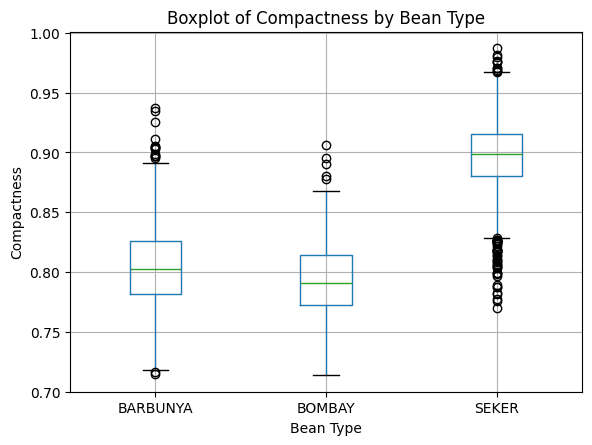

In [340]:
bean_information.boxplot(column="Compactness", by="Class")
plt.title("Boxplot of Compactness by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Compactness")
plt.show()

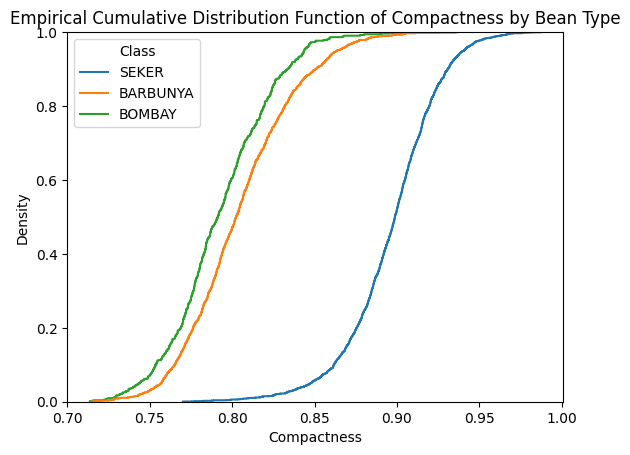

In [341]:
sb.ecdfplot(data=bean_information, x="Compactness", hue="Class", stat='proportion', complementary=False)

plt.title("Empirical Cumulative Distribution Function of Compactness by Bean Type")
plt.xlabel("Compactness")
plt.ylabel("Density")
plt.show()

The ECD Function for Compactness above emphasises the variability amongst the data especially for the Seker bean, as compared to the other beans, its function ranges over a greater distance, from roughly 0.775 to 0.95, highlighting the measurements sitting outside the IQR for this attribute. Whereas, the Barbunya and Bombay beans both had similar variability and values. For this reason class is not completely discriminitive for compactness. 

In [342]:
# Task 3 Calculations

Seker_Compactness_mean = bean_information.loc[bean_information["Class"] == "SEKER", "Compactness"].mean()

Barbunya_Compactness_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Compactness"].mean()

Bombay_Compactness_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "Compactness"].mean()

Seker_Compactness_std = bean_information.loc[bean_information["Class"] == "SEKER", "Compactness"].std()

Barbunya_Compactness_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "Compactness"].std()

Bombay_Compactness_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "Compactness"].std()

table["Compactness Mean"] = [Seker_Compactness_mean, Barbunya_Compactness_mean, Bombay_Compactness_mean]

table["Compactness Standard Deviation"] = [Seker_Compactness_std, Barbunya_Compactness_std, Bombay_Compactness_std]

### 2.2.14 Class and Shape Factor 1

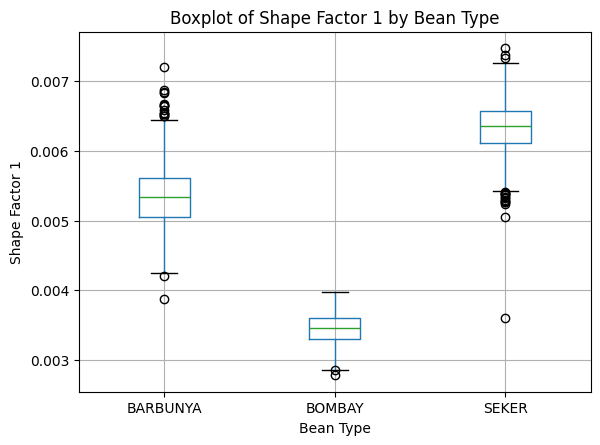

In [343]:
bean_information.boxplot(column="ShapeFactor1", by="Class")
plt.title("Boxplot of Shape Factor 1 by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Shape Factor 1")
plt.show()

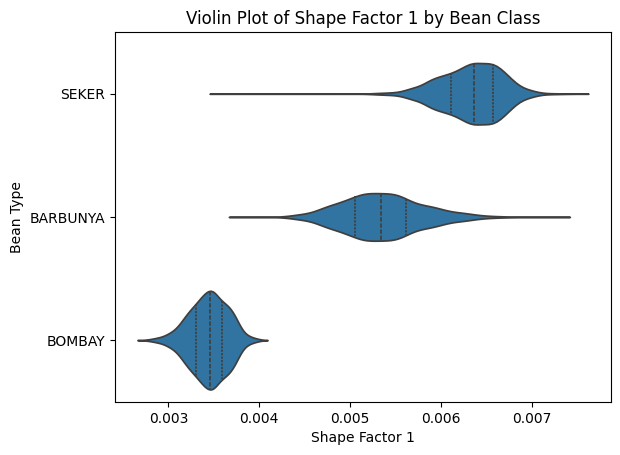

In [344]:
sb.violinplot(data=bean_information, x="ShapeFactor1", y="Class", inner="quartile")
plt.title("Violin Plot of Shape Factor 1 by Bean Class")
plt.xlabel("Shape Factor 1")
plt.ylabel("Bean Type")
plt.show()


The distirbutions for Shape Factor 1 are all present some factor of difference from one another, firstly, the Seker has a wide distribution with a moderate skew to the left due to outliers beyond the IQR. Of the three, the Barbunya distribution for Shape Factor 1 has the most variability, with a wide distribution with tails on each end, a product of outliers outside its IQR. Finally, the Bombay beans had a tight distribution focused between 0.003 and 0.004, however with the exeption of a single outlier. Class is moderately discriminative for Shape Factor 1, as althought there is clear seperation, there is slight overlap between Barbunya and Seker bean measurements. 

In [345]:
# Task 3 Calculations

Seker_ShapeFactor1_mean = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor1"].mean()

Barbunya_ShapeFactor1_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor1"].mean()

Bombay_ShapeFactor1_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor1"].mean()

Seker_ShapeFactor1_std = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor1"].std()

Barbunya_ShapeFactor1_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor1"].std()

Bombay_ShapeFactor1_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor1"].std()

table["Shape Factor 1 Mean"] = [Seker_ShapeFactor1_mean, Barbunya_ShapeFactor1_mean, Bombay_ShapeFactor1_mean]

table["Shape Factor 1 Standard Deviation"] = [Seker_ShapeFactor1_std, Barbunya_ShapeFactor1_std, Bombay_ShapeFactor1_std]

### 2.2.15 Class and Shape Factor 2

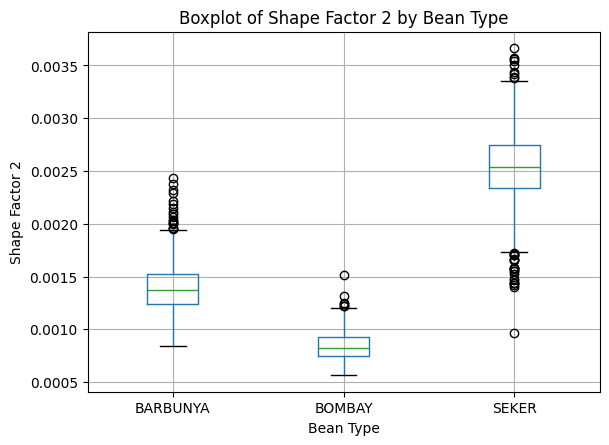

In [346]:
bean_information.boxplot(column="ShapeFactor2", by="Class")
plt.title("Boxplot of Shape Factor 2 by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Shape Factor 2")
plt.show()

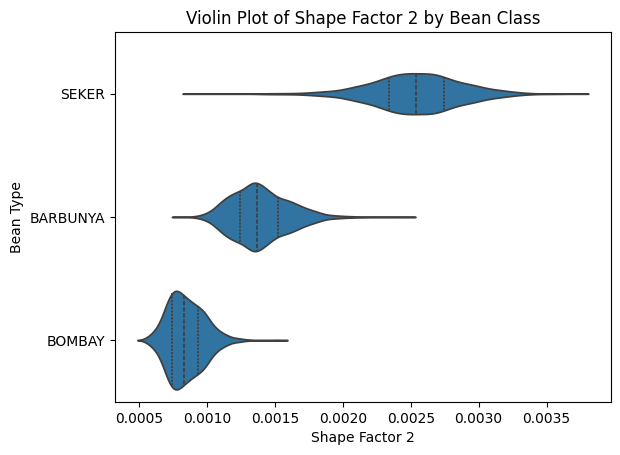

In [347]:
sb.violinplot(data=bean_information, x="ShapeFactor2", y="Class", inner="quartile")
plt.title("Violin Plot of Shape Factor 2 by Bean Class")
plt.xlabel("Shape Factor 2")
plt.ylabel("Bean Type")
plt.show()


For Shape Factor 2, we have slightly different results, with the sshape factor 2 of Seker beans being far more variable, centralised at approx. 0.0026 and distributing normally outward from 0.0013 to 0.0038 approximitely. For Barbunya beans, it was far more compact, with the exception of outliers producing a tail to the right of the distribution. Finally, the Bombay possesses a similar distribution to its Shape Factor 1 counterpart, with tight localisation between 0.0006 to 0.0010 approximitely.

In [348]:
# Task 3 Calculations

Seker_ShapeFactor2_mean = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor2"].mean()

Barbunya_ShapeFactor2_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor2"].mean()

Bombay_ShapeFactor2_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor2"].mean()

Seker_ShapeFactor2_std = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor2"].std()

Barbunya_ShapeFactor2_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor2"].std()

Bombay_ShapeFactor2_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor2"].std()

table["Shape Factor 2 Mean"] = [Seker_ShapeFactor2_mean, Barbunya_ShapeFactor2_mean, Bombay_ShapeFactor2_mean]

table["Shape Factor 2 Standard Deviation"] = [Seker_ShapeFactor2_std, Barbunya_ShapeFactor2_std, Bombay_ShapeFactor2_std]

### 2.2.16 Class and Shape Factor 3

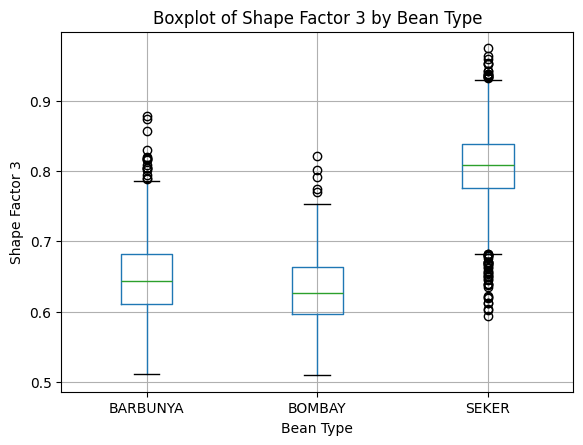

In [349]:
bean_information.boxplot(column="ShapeFactor3", by="Class")
plt.title("Boxplot of Shape Factor 3 by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Shape Factor 3")
plt.show()

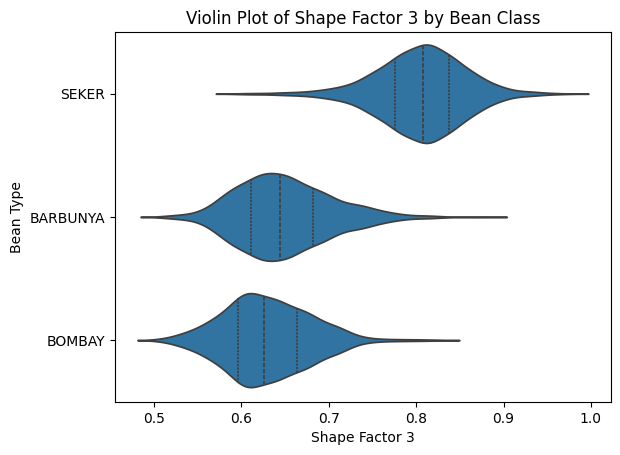

In [350]:
sb.violinplot(data=bean_information, x="ShapeFactor3", y="Class", inner="quartile")
plt.title("Violin Plot of Shape Factor 3 by Bean Class")
plt.xlabel("Shape Factor 3")
plt.ylabel("Bean Type")
plt.show()

For Shape Factor 3, we have a more interesting distribution, with the Seker beans showing the widest and most variable distribution, ranging from approximately 0.6 to 1.0. The highest density of data points is centered around the median, which is located at about 0.81. The distributions for both Barbunya and Bombay beans are asymmetrical and skewed. The central body of the Barbunya distribution is centered at about 0.65, with a longer tail extending to the right, indicating that while most data points are concentrated in a narrower range, there are some with significantly higher Shape Factor 3 values. The Bombay distribution is very similar in shape, with its primary concentration of data points also skewed towards the lower end of its range, and a similar tail to the right. 

### 2.2.17 Class and Shape Factor 4

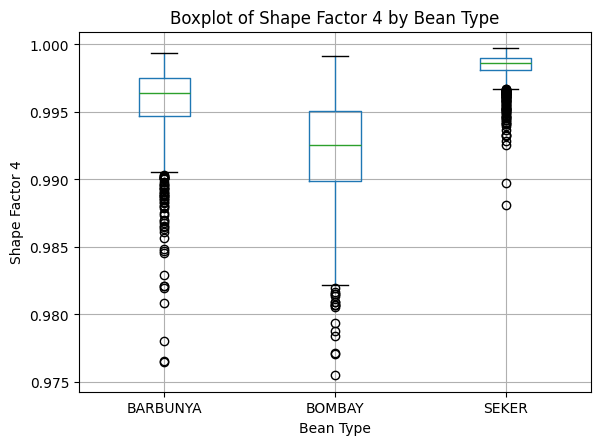

In [351]:
bean_information.boxplot(column="ShapeFactor4", by="Class")
plt.title("Boxplot of Shape Factor 4 by Bean Type")
plt.suptitle("") 
plt.xlabel("Bean Type")
plt.ylabel("Shape Factor 4")
plt.show()

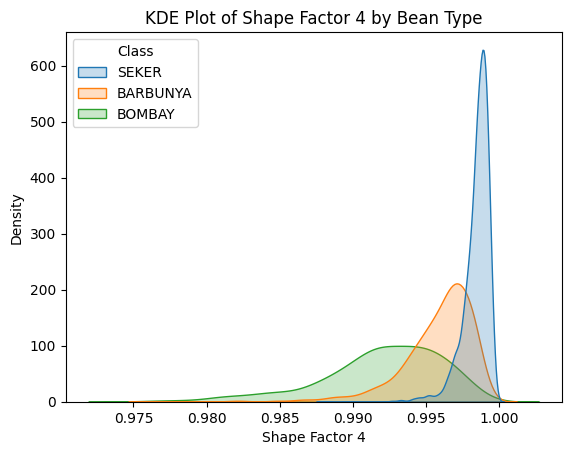

In [352]:
sb.kdeplot(data=bean_information, x="ShapeFactor4", hue="Class", fill=True, common_norm=False)

plt.title("KDE Plot of Shape Factor 4 by Bean Type")
plt.xlabel("Shape Factor 4")
plt.ylabel("Density")
plt.show()


For Shape Factor 4, the distributions show a clear difference in variability, with all beans having very high values approaching 1. The Seker beans are characterized by a highly concentrated distribution, with values tightly clustered around a single, dominant peak very close to 1. This indicates a minimal variation in this particular shape factor. In contrast, the Barbunya beans have a much wider and flatter distribution, showing significantly more variability, with a peak density occurring at a slightly lower value than Seker. Finally, the Bombay beans possess the most variable and least concentrated distribution, with values spread across the widest range and showing a clear negative skew, indicating a greater number of lower values for Shape Factor 4.

In [353]:
# Task 3 Calculations

Seker_ShapeFactor4_mean = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor4"].mean()

Barbunya_ShapeFactor4_mean = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor4"].mean()

Bombay_ShapeFactor4_mean = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor4"].mean()

Seker_ShapeFactor4_std = bean_information.loc[bean_information["Class"] == "SEKER", "ShapeFactor4"].std()

Barbunya_ShapeFactor4_std = bean_information.loc[bean_information["Class"] == "BARBUNYA", "ShapeFactor4"].std()

Bombay_ShapeFactor4_std = bean_information.loc[bean_information["Class"] == "BOMBAY", "ShapeFactor4"].std()

table["Shape Factor 4 Mean"] = [Seker_ShapeFactor4_mean, Barbunya_ShapeFactor4_mean, Bombay_ShapeFactor4_mean]

table["Shape Factor 4 Standard Deviation"] = [Seker_ShapeFactor4_std, Barbunya_ShapeFactor4_std, Bombay_ShapeFactor4_std]

## Task 3: Mean and Standard Deviation

Throughout the Bivariate EDA section of the project, a dictionary was created which stored the mean and standard deviation for all characteristics considering their class. Now that we have this, we can convert it into a data frame using pandas, and format it accordingly. 

In [354]:
df = pd.DataFrame(table)

df_long = df.melt(id_vars="Beans", var_name="FeatureStat", value_name="Value")

df_long["Stat"] = df_long["FeatureStat"].str.extract(r"(Mean|Standard Deviation)$")
df_long["Feature"] = df_long["FeatureStat"].str.replace(r" (Mean|Standard Deviation)$", "", regex=True)

df_long = df_long.drop(columns="FeatureStat")

final_df = df_long.pivot(index=["Beans", "Stat"], columns="Feature", values="Value")
final_df = final_df.sort_index(level=[0, 1])

final_df


Feature                               Area  Aspect Ratio  Compactness  \
Beans    Stat                                                           
Barbunya Mean                 69773.730099      1.544312     0.804968   
         Standard Deviation   10154.394481      0.125843     0.033388   
Bombay   Mean                172707.360308      1.584561     0.792824   
         Standard Deviation   24985.633034      0.118802     0.030723   
Seker    Mean                 39919.736036      1.245045     0.896836   
         Standard Deviation    4850.581040      0.082135     0.028742   

Feature                        Convex Area  Eccentricity  Equivelant Diameter  \
Beans    Stat                                                                   
Barbunya Mean                 71070.109848      0.754722           297.286715   
         Standard Deviation   10613.781361      0.050042            21.971267   
Bombay   Mean                175709.500000      0.770282           468.917646   
         Standard Deviation   23756.875254      0.041177            31.298790   
Seker    Mean                 40269.378151      0.584679           225.065226   
         Standard Deviation    4820.365159      0.071218            13.440577   

Feature                        Extent  Major Axis Length  Minor Axis Length  \
Beans    Stat                                                                 
Barbunya Mean                0.749411         370.009948         240.361308   
         Standard Deviation  0.040369          32.274890          19.945673   
Bombay   Mean                0.777183         592.851939         374.345861   
         Standard Deviation  0.038045          53.001553          23.286077   
Seker    Mean                0.771745         251.341592         201.923406   
         Standard Deviation  0.018679          20.033196          10.934321   

Feature                        Perimeter  Roundness  Shape Factor 1  \
Beans    Stat                                                         
Barbunya Mean                1045.880247   0.800449        0.005358   
         Standard Deviation    89.358905   0.048268        0.000443   
Bombay   Mean                1584.708657   0.864746        0.003441   
         Standard Deviation   115.510911   0.026348        0.000209   
Seker    Mean                 727.532249   0.944821        0.006332   
         Standard Deviation    47.592959   0.030891        0.000339   

Feature                      Shape Factor 2  Shape Factor 4  Solidity  
Beans    Stat                                                          
Barbunya Mean                      0.001394        0.995754  0.982850  
         Standard Deviation        0.000214        0.002628  0.003970  
Bombay   Mean                      0.000845        0.991972  0.987079  
         Standard Deviation        0.000135        0.004168  0.004752  
Seker    Mean                      0.002540        0.998414  0.990410  
         Standard Deviation        0.000327        0.000947  0.002431

Above we can see the means and standard deviations considering class for all attributes in alphabetical order. From this data we can make some conclusions regarding the beans, including; Bombay beans are by far the largest of the three, additionally the standard deviation of 172707 is also the largest, suggesting that not only are the beans large in size, but large in variability. This pattern holds for the Perimeter of the bean and the Axis Lengths of the beans. Regarding Shape; Seker beans are the most compact and round, having the lowest variability in compactness (~ 0.029)with a standard deviation in roundness of roughly 0.03, near the lowest out of all beans as well. Suggesting that the shape properties are subject to less variability as oposed to others. Finally, considering all attributes it is clear that the Bombay bean has the highest variability compared to Seker and Barbunya, although it could be argued that the variabilty among the beans is directly proporitonal to the amount of samples taken for each, as Seker, the bean with by far the most samples, has the lowest variability, I do think that the variability levels found in all beans is  merely a characteristic of their nature, that is to say. Bombay beans are more diverse in nature, whereas Seker are more consistent, and Barbunya are inbetween.

# Task 4: Column Correlations

### 4.1 Correlation Heatmaps

Using a correlation heatmap, we can determine the correlation coefficiants between any two combinations of numerical attributes given their class, additonally we can use such coefficients to look into their relationship between one another. The correlation table can be seen below.

In [436]:
attributes = bean_information[["Area", "Perimeter","MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4", "Class"]]
heatmap = attributes.drop(columns="Class")
heatmap.corr().style.background_gradient(cmap="Reds")

This shows the correlation coefficients for all attributes no matter the class of beans, if we isolate by class, we can determine the correlations between attributes given class.

### 4.1.1 Seker Heatmap

In [437]:
seker_numeric = attributes[attributes["Class"] == "SEKER"]

In [438]:
seker_numeric = seker_numeric.drop(columns="Class")
seker_numeric.corr().style.background_gradient(cmap="Blues")

### 4.1.2 Barbunya Heatmap

In [439]:
barbunya_numeric = attributes[attributes["Class"] == "BARBUNYA"]

In [440]:
barbunya_numeric = barbunya_numeric.drop(columns="Class")
barbunya_numeric.corr().style.background_gradient(cmap="Oranges")

### 4.1.3 Bombay Heatmap

In [441]:
bombay_numeric = attributes[attributes["Class"] == "BOMBAY"]

In [442]:
bombay_numeric = bombay_numeric.drop(columns="Class")
bombay_numeric.corr().style.background_gradient(cmap="Greens")

Given the Correlation Heat Maps for all three Beans as well as for the entire dataset, there are many unique relationships that can be explored.

## 4.2.1 Major and Minor Axis Length Correlation by Class

To begin with, looking into the three beans relationship between Major and Minor Axis Length reveals some interesting aspects of pooled data. 

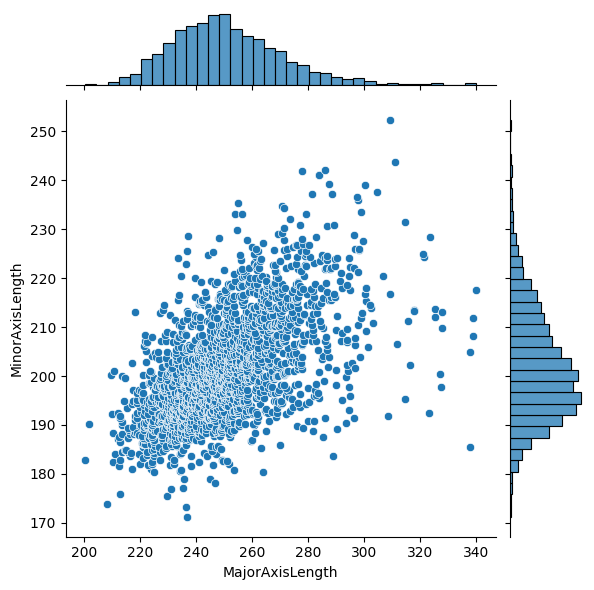

In [443]:
sb.jointplot(data=seker_numeric, x="MajorAxisLength", y="MinorAxisLength")

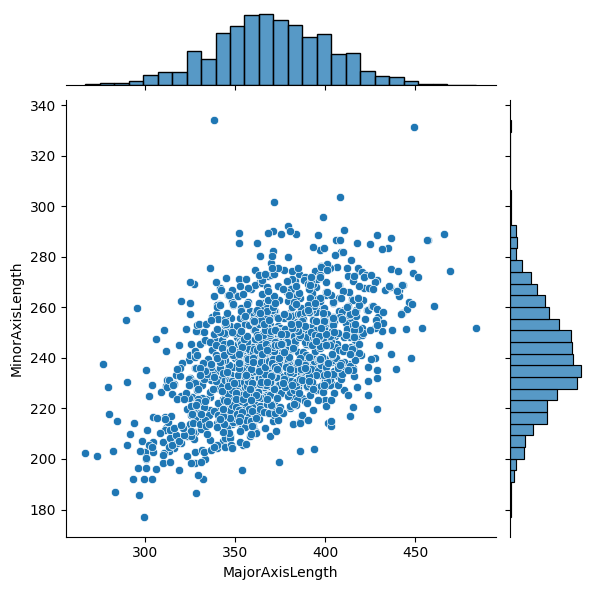

In [363]:
sb.jointplot(data=barbunya_numeric, x="MajorAxisLength", y="MinorAxisLength")

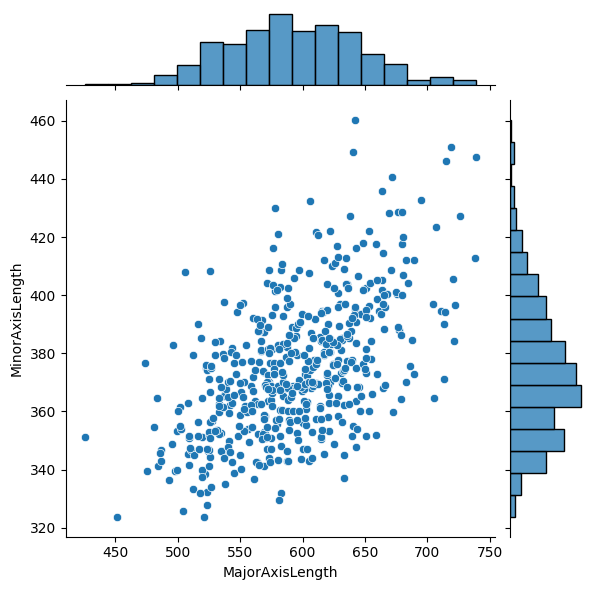

In [364]:
sb.jointplot(data=bombay_numeric, x="MajorAxisLength", y="MinorAxisLength")

For all three bean types, the correlation between Major Axis Length and Minor Axis Length is moderate, with coefficients ranging approximately from 0.51 to 0.56. However, when we pool the data across all classes, the correlation rises to 0.95, indicating a much stronger relationship.

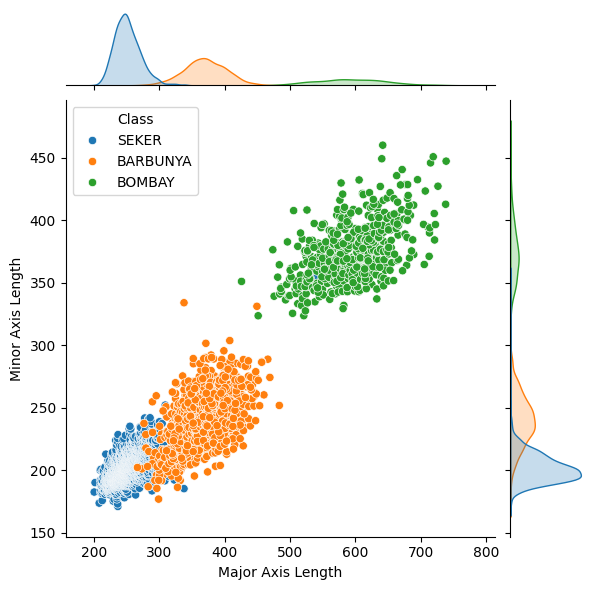

In [365]:
sb.jointplot(data=bean_information, x="MajorAxisLength", y="MinorAxisLength", hue="Class")


plt.xlabel("Major Axis Length")
plt.ylabel("Minor Axis Length")
plt.show()


This difference occurs because each class has a different overall size range. Pooling the data masks the class-specific relationships, giving the misleading impression that Major and Minor Axis Length are very strongly correlated within each class. The jointplot below, with points colored by class, clearly illustrates this effect, when in reality, the relationship is dependant on class. 

### 4.2.2 Shape Factor 2 and 3 Correlation by Class

Analysing Shape Factors 2 and 3 reveals, contraringly to Major and Minor Axis Length, that pooled data can still present patterns reflective of its classes. 

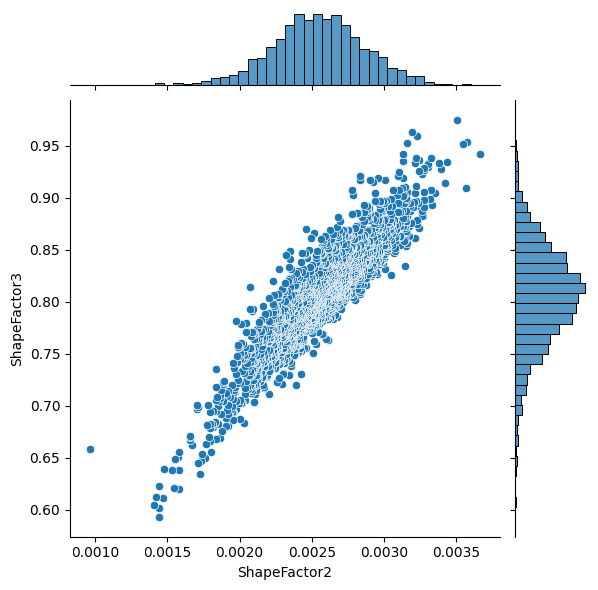

In [366]:
sb.jointplot(data=seker_numeric, x="ShapeFactor2", y="ShapeFactor3")

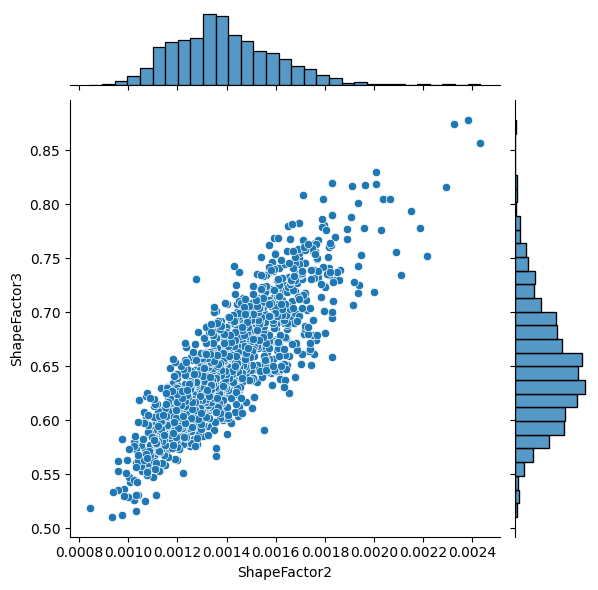

In [367]:
sb.jointplot(data=barbunya_numeric, x="ShapeFactor2", y="ShapeFactor3")

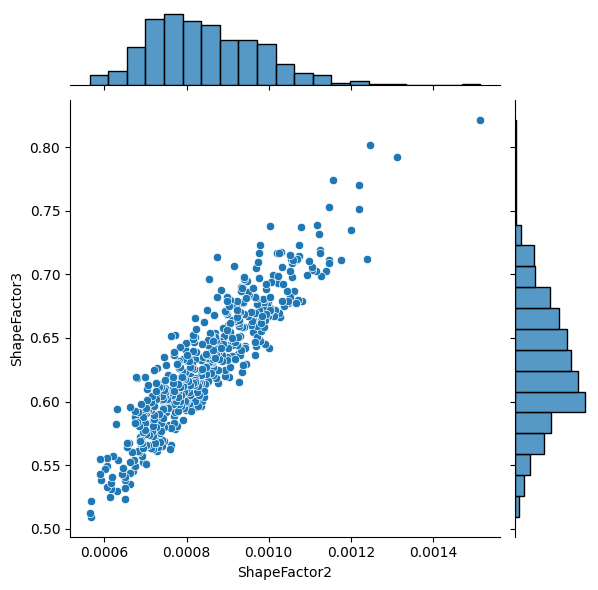

In [368]:
sb.jointplot(data=bombay_numeric, x="ShapeFactor2", y="ShapeFactor3")

Above we can see that for all plots that the relationship between Shape Factor 2 and 3 is strong positive, with all three having correlation coefficients between 0.86 and 0.93; In contrast to Major and Minor Axis Length however, seen below, the trend remains consistent when the data is pooled.

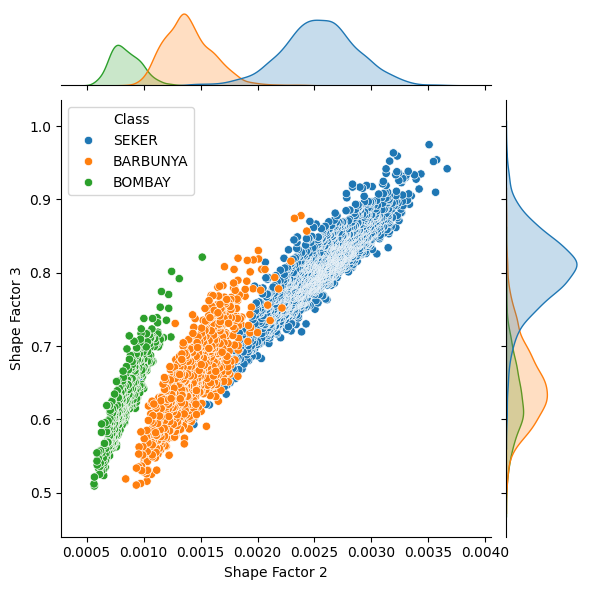

In [369]:
sb.jointplot(data=bean_information, x="ShapeFactor2", y="ShapeFactor3", hue="Class")


plt.xlabel("Shape Factor 2")
plt.ylabel("Shape Factor 3")
plt.show()


With a correlation coefficient of approximitely 0.94, and evident in our jointplot, pooling the data maintains a similar trend, indicating that pooling the data does not warrant any artifical correlation. This suggests that Shape Factor 2 and 3 are fundamentally related, regardless of bean type/class. 

### 4.2.3 Aspect Ratio and Convex Area Correlation by Class

While some relationships between numerical features are consistent across all bean types, others vary noticeably by class. In this section, we examine variable pairs whose correlations differ between Bombay, Seker, and Barbunya beans, highlighting how pooling the data can obscure these class-specific patterns.

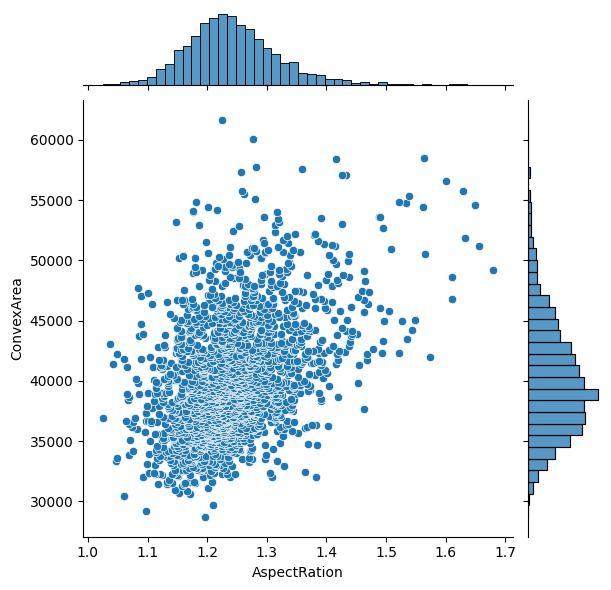

In [444]:
sb.jointplot(data=seker_numeric, x="AspectRation", y="ConvexArea")

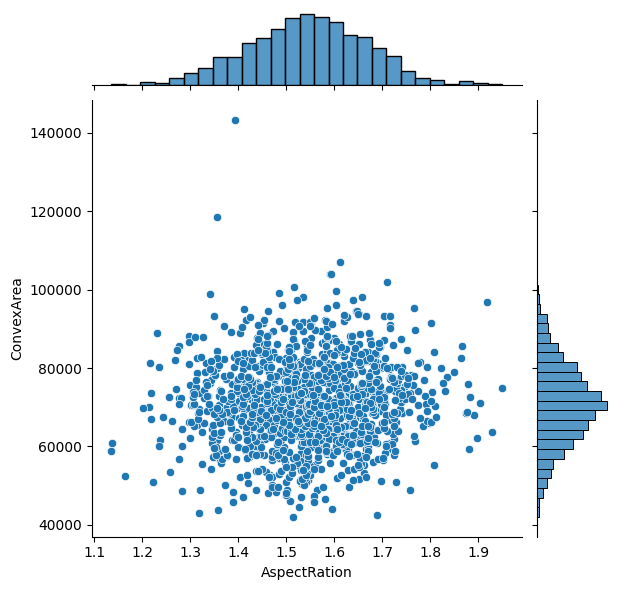

In [371]:
sb.jointplot(data=barbunya_numeric, x="AspectRation", y="ConvexArea")

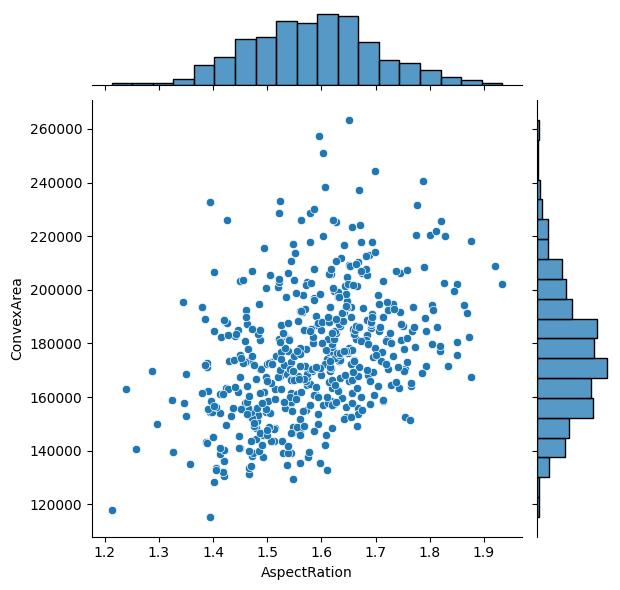

In [372]:
sb.jointplot(data=bombay_numeric, x="AspectRation", y="ConvexArea")

For Barbunya Beans, the relationship between Convex Area and Aspect Ratio is shown to be not correlated, through the jointplot and through its correlation coefficient of 0.06 approximitely. For Seker and Bombay beans, a weak positive relationship can be observed, when we pool this data and configure a correlation we see that pooling reinforces mismatched correlations.

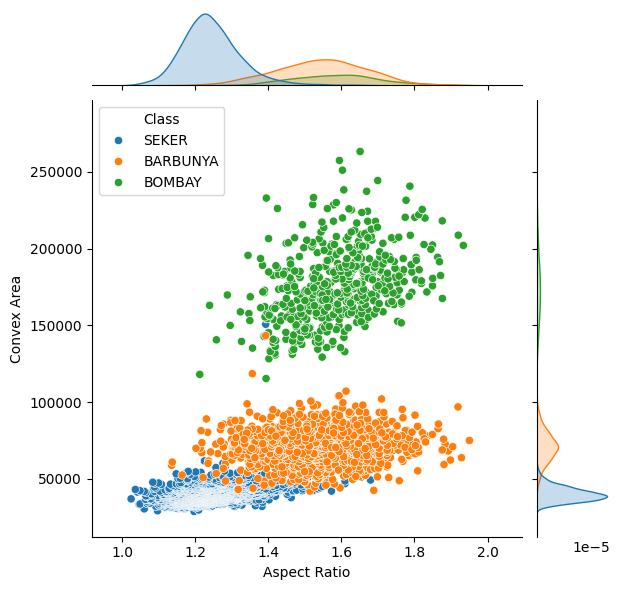

In [373]:
sb.jointplot(data=bean_information, x="AspectRation", y="ConvexArea", hue="Class")


plt.xlabel("Aspect Ratio")
plt.ylabel("Convex Area")
plt.show()


With a pooled correlation coefficient of roughly 0.63, the relationship between Aspect Ratio and Convex Area is reinforced across the dataset. Unlike the Major and Minor Axis Lengths, where pooling masked class-specific differences, this relationship remains consistent for some classes, highlighting that certain shape characteristics are shared across beans while others remain class-dependent.

### 4.2.4 Eccentricity and Compactness Correlation by Class

A more robust relationship compared to the others investigated thus far, would be between Eccentricity and Compactness. With the classes and the pooled distribution showing a strong negative correlation. 

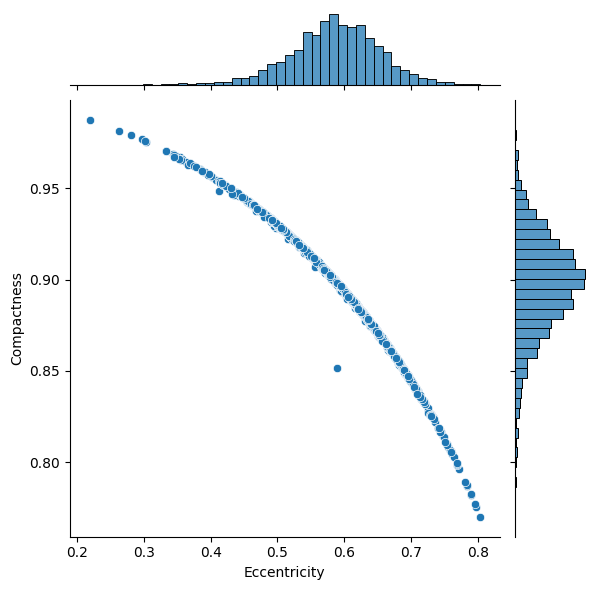

In [374]:
sb.jointplot(data=seker_numeric, x="Eccentricity", y="Compactness")

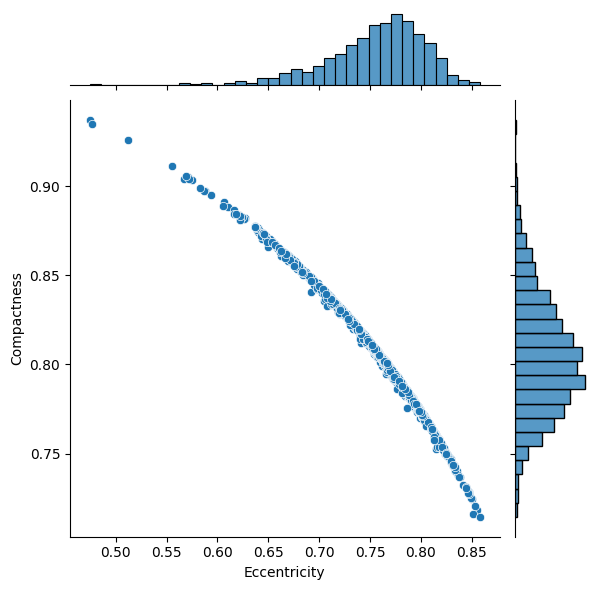

In [375]:
sb.jointplot(data=barbunya_numeric, x="Eccentricity", y="Compactness")

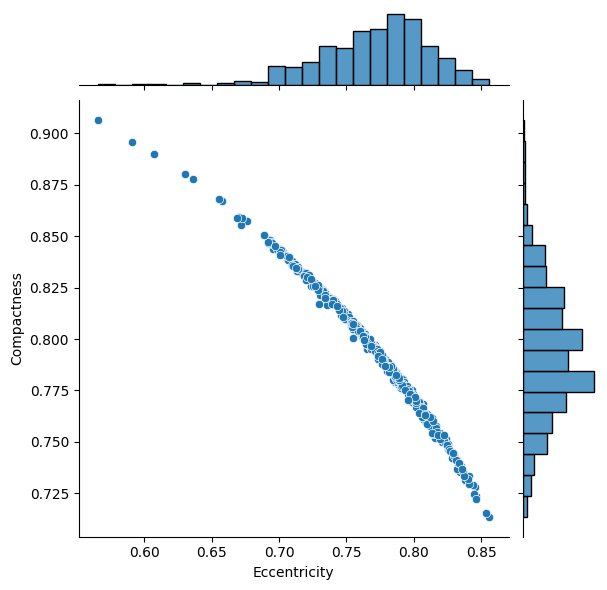

In [376]:
sb.jointplot(data=bombay_numeric, x="Eccentricity", y="Compactness")

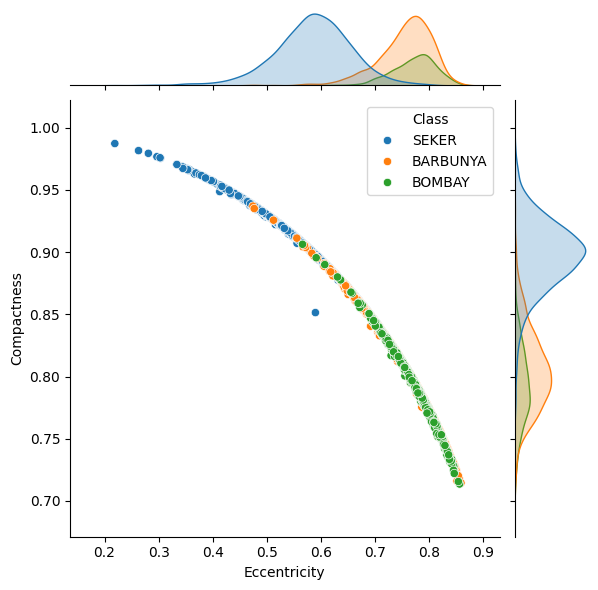

In [377]:
sb.jointplot(data=bean_information, x="Eccentricity", y="Compactness", hue="Class")


plt.xlabel("Eccentricity")
plt.ylabel("Compactness")
plt.show()


Although intuitive, this relationship is a clear example of a class-independent correlation. It shows that as Eccentricity increases, the Compactness of the bean decreases, demonstrating that these attributes behave consistently across all classes rather than being specific to any single class.

### 4.2.5 Equivelant Diameter and Extent Correlation by Class

The relationship between these two factors are intuitively not related, as Extent measures the ratio of pixels in a box surrounding the bean and equivelant diameter being the diameter of a circle given the beans area, in this case, it is interesting to see how pooled data can maintain this relationship despite different bean classes having different equivelant diameter lengths. 

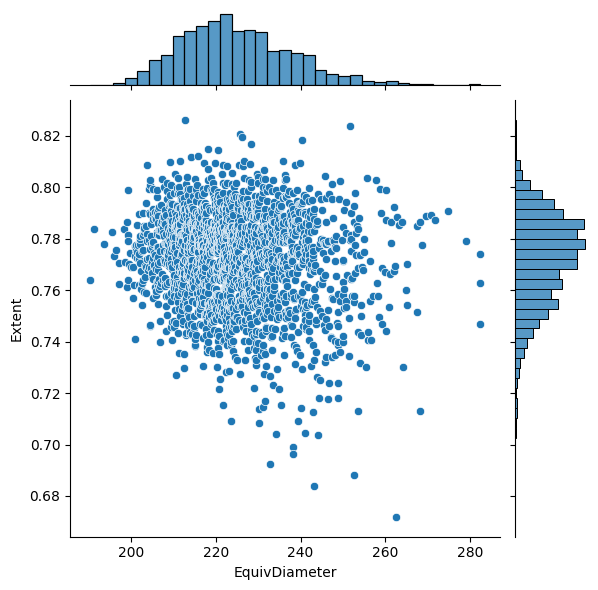

In [378]:
sb.jointplot(data=seker_numeric, x="EquivDiameter", y="Extent")

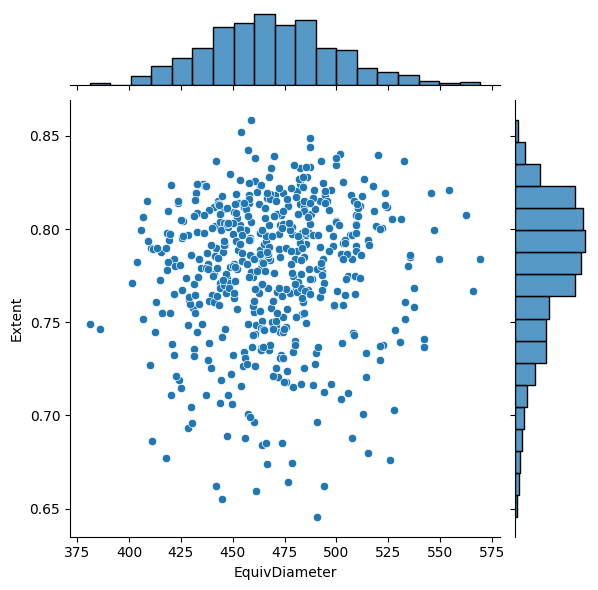

In [379]:
sb.jointplot(data=bombay_numeric, x="EquivDiameter", y="Extent")

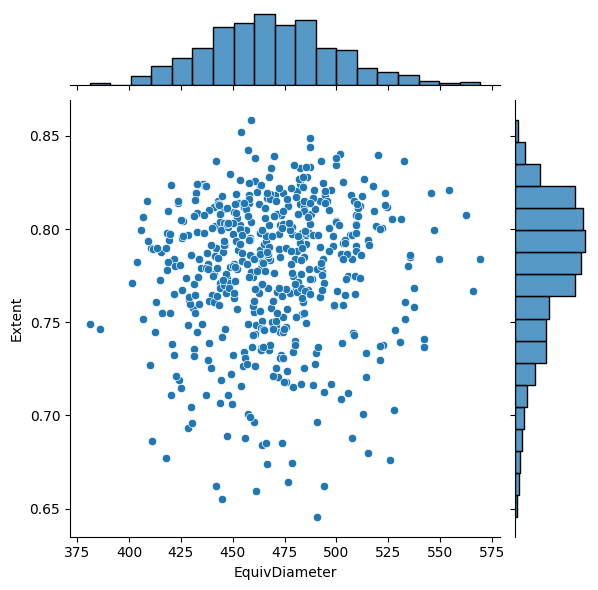

In [380]:
sb.jointplot(data=bombay_numeric, x="EquivDiameter", y="Extent")


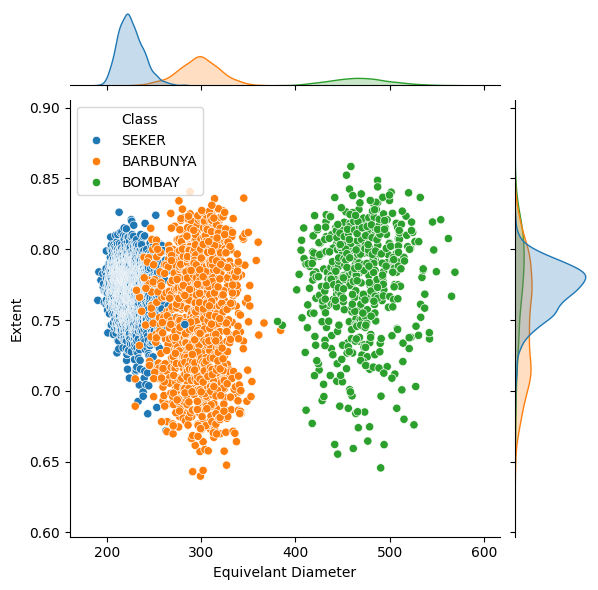

In [381]:
sb.jointplot(data=bean_information, x="EquivDiameter", y="Extent", hue="Class")


plt.xlabel("Equivelant Diameter")
plt.ylabel("Extent")
plt.show()


This analysis demonstrates that correlations between bean shape attributes can differ depending on the feature pair. While some relationships, like Major vs Minor Axis Length, show class-specific patterns that are masked when pooled, the correlation between Extent and Equivalent Diameter remains relatively consistent across classes. This suggests that these particular geometric characteristics are more uniform across bean types, reflecting general structural patterns rather than class-dependent differences.

# Task 5: K-Means Clustering

### 5.1 Preperation

Clustering refers to the approach to create groups among data based on similarity. K-means Clustering is an usupervised clustering algorithm, that aims to discover inherant structures within unlabeled datasets.

When selecting features for clustering, my goal was to test whether the K-Means algorithm could identify the Bean class without explicitly providing it. To do this, I chose variables that showed clear distinctions between classes: Area, Perimeter, Major Axis Length, and Equivalent Diameter, as these size-based attributes demonstrated noticeable class separation in the bivariate analysis. Additionally, I included ShapeFactor1 as a shape-related attribute. Although it did not provide strong discrimination between classes, including a shape factor was important because bean classification depends on more than just size.

In [382]:
data_to_cluster = bean_information[["Area", "Perimeter", "MajorAxisLength", "EquivDiameter", "ShapeFactor1"]]

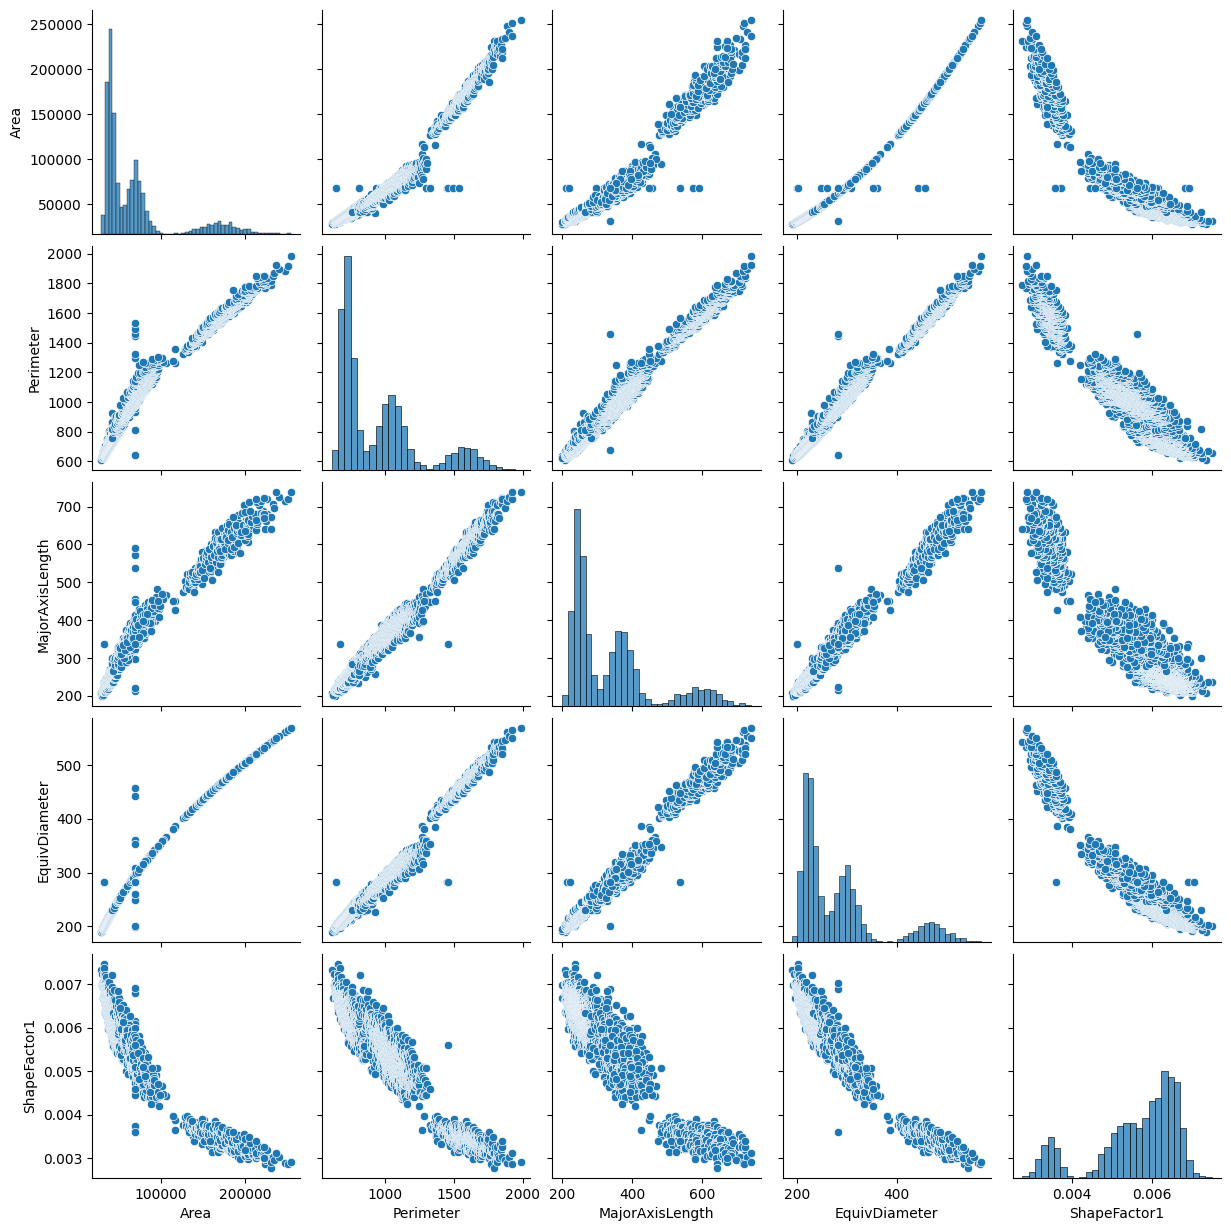

In [383]:
sb.pairplot(data_to_cluster)

Shown above is the clustered data. In the size histograms, we can see that the attributes generally separate into distinct groups corresponding to the clusters. The scatter plots of the size variables show a mostly strong positive linear relationship, with the exception of some outliers. For the single shape attribute included, we observe a moderate-to-strong negative linear relationship and a histogram that partially separates into three groups, although two of the groups are close together.
This indicates that the K-Means algorithm is primarily capturing differences in bean size, which aligns with the clear distinctions observed during bivariate analysis. The inclusion of the shape attribute adds some nuance but does not strongly differentiate the classes, highlighting that size is the dominant factor in clustering these beans.

In [384]:
%pip install sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [385]:
scaled_data = minmax_scale(data_to_cluster)

k_means = KMeans(n_clusters=3)

k_means.fit_transform(scaled_data)

data_to_cluster.loc[:, "cluster_labels"] = k_means.labels_


/tmp/ipykernel_862917/3319013183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_cluster.loc[:, "cluster_labels"] = k_means.labels_


Now that we have our clusters, we can now see if they have seperated by class effectively.

## 5.2 Observations

### 5.2.1 Size Attribute Clustering

Text(0.5, 1.0, 'Perimeter against Area (Clustered)')

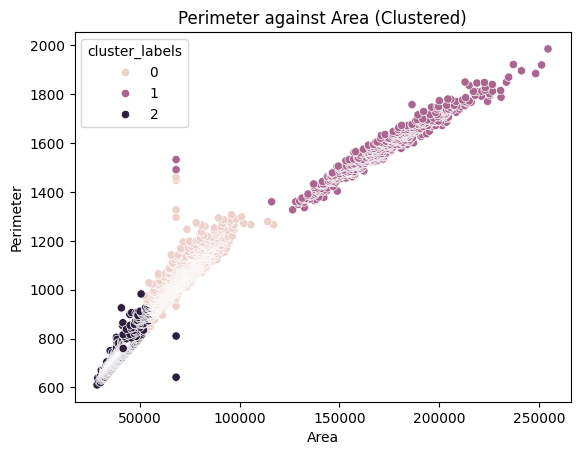

In [386]:
sb.scatterplot(data=data_to_cluster, x="Area", y="Perimeter", hue="cluster_labels")
plt.title("Perimeter against Area (Clustered)")

If we compare this to the dataset, seperating by Class

Text(0.5, 1.0, 'Perimeter against Area (Real)')

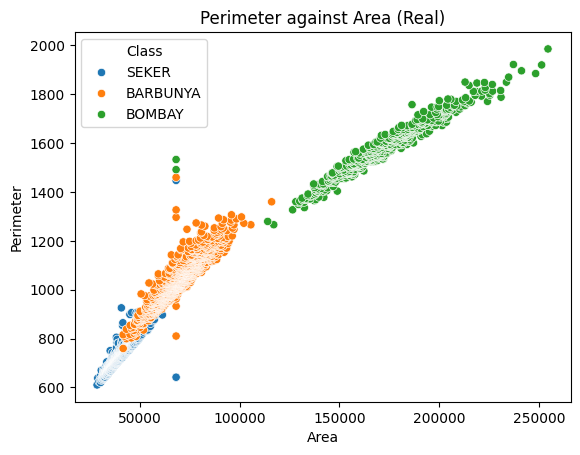

In [387]:
sb.scatterplot(data=bean_information, x="Area", y="Perimeter", hue="Class")
plt.title("Perimeter against Area (Real)")

Comparing the clustered data with the actual classes, we can see that the K-Means algorithm was able to successfully identify the bean classes when considering Area and Perimeter. The clusters generally correspond well to the true class labels, indicating that these size based attributes capture much of the variation between classes. However, a few misclassifications or overlaps are present, likely due to individual beans with sizes near class boundaries. Overall, this demonstrates that Area and Perimeter are strong discriminative features for clustering these beans.

Additionally, lets check two other Size attributes.

Text(0.5, 1.0, 'Major Axis Length against Equivelant Diameter (Clustered)')

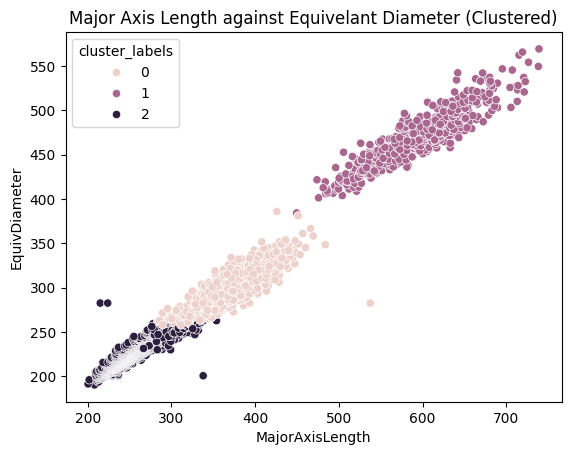

In [388]:
sb.scatterplot(data=data_to_cluster, x="MajorAxisLength", y="EquivDiameter", hue="cluster_labels")
plt.title("Major Axis Length against Equivelant Diameter (Clustered)")

Text(0.5, 1.0, 'Major Axis Length against Equivelant Diameter (Real)')

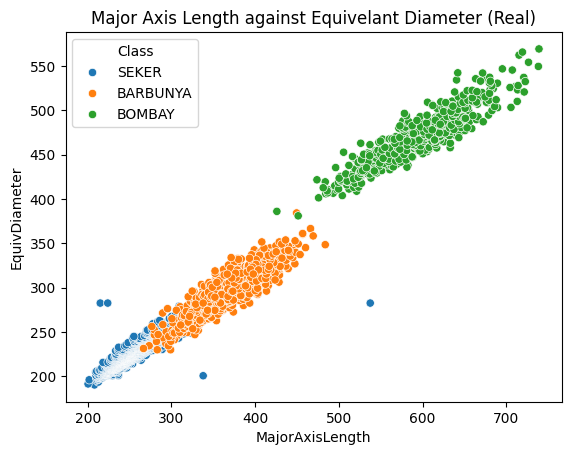

In [389]:
sb.scatterplot(data=bean_information, x="MajorAxisLength", y="EquivDiameter", hue="Class")
plt.title("Major Axis Length against Equivelant Diameter (Real)")

Again, the K-Means algorithm effectively identified the groups when considering two different shape attributes. The resulting clusters largely correspond to the true class labels, suggesting that these shape attributes capture meaningful structural differences between the beans. While there are minor overlaps or misclassifications between clusters, likely due to limited variation in these particular shape attributes; the overall clustering performance indicates that shape can provide valuable information in distinguishing between classes, especially when combined with size attributes.

## 5.2.2 Shape and Size Attribute Clustering

Now looking at how it did considering one shape and one size element.

Text(0.5, 1.0, 'Equivelant Diameter against Shape Factor 1 (Clustered)')

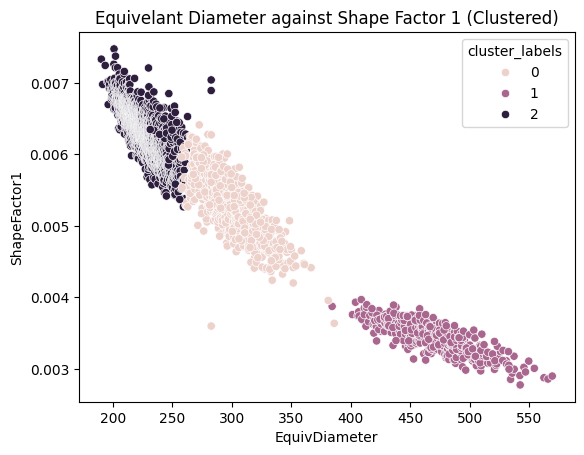

In [390]:
sb.scatterplot(data=data_to_cluster, x="EquivDiameter", y="ShapeFactor1", hue="cluster_labels")
plt.title("Equivelant Diameter against Shape Factor 1 (Clustered)")

Text(0.5, 1.0, 'Equivelant Diameter against Shape Factor 1 (Real)')

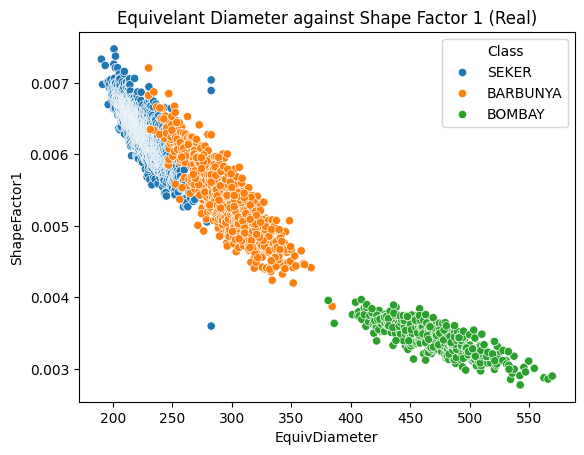

In [391]:
sb.scatterplot(data=bean_information, x="EquivDiameter", y="ShapeFactor1", hue="Class")
plt.title("Equivelant Diameter against Shape Factor 1 (Real)")

Considering both shape and size, the clustering performed well in correctly identifying the groups. There was some mislabeling between clusters 0 and 2, which likely stems from ShapeFactor1 not being highly discriminative. Despite this, the algorithm was still able to capture the primary groupings, demonstrating that size attributes are the dominant factor in distinguishing the bean classes, while shape attributes provide supplementary refinement.

Text(0.5, 1.0, 'Major Axis Length against Shape Factor 1 (Clustered)')

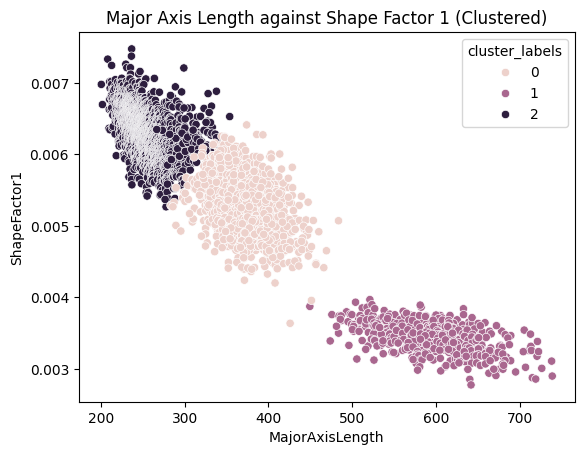

In [392]:
sb.scatterplot(data=data_to_cluster, x="MajorAxisLength", y="ShapeFactor1", hue="cluster_labels")
plt.title("Major Axis Length against Shape Factor 1 (Clustered)")

Text(0.5, 1.0, 'Major Axis Length against Shape Factor 1 (Real)')

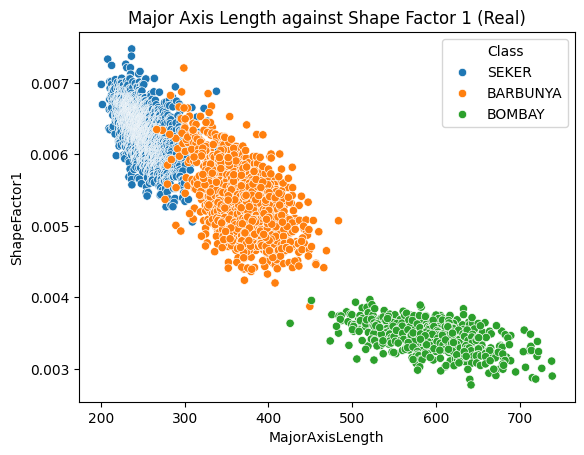

In [393]:
sb.scatterplot(data=bean_information, x="MajorAxisLength", y="ShapeFactor1", hue="Class")
plt.title("Major Axis Length against Shape Factor 1 (Real)")

When clustering using Equivalent Diameter and ShapeFactor1, the K-Means algorithm is able to effectively separate the beans into groups that largely correspond to their classes. Equivalent Diameter captures the dominant size differences between beans, while ShapeFactor1 provides additional discriminative information. Although ShapeFactor1 alone has moderate separation power, combining it with a strong size attribute like Equivalent Diameter improves cluster identification, even if minor misclassifications occur. This demonstrates that size remains the primary driver of clustering, but the inclusion of informative shape features can meaningfully refine the group separation.

## 5.2.3 Shape Attribute Clustering

Finally we'll see how well it did identifying the groups based solely on shape factor.

Text(0.5, 1.0, 'Shape Factor 1 Histogram(Clustered)')

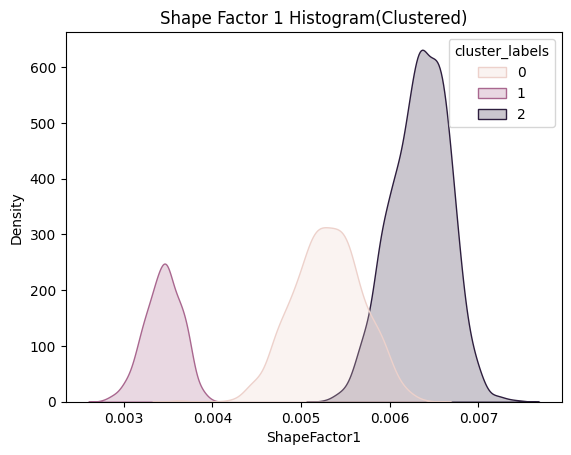

In [394]:
sb.kdeplot(data=data_to_cluster, x="ShapeFactor1", hue="cluster_labels", fill=True)
plt.title("Shape Factor 1 Histogram(Clustered)")

Text(0.5, 1.0, 'Shape Factor 1 Histogram (Real)')

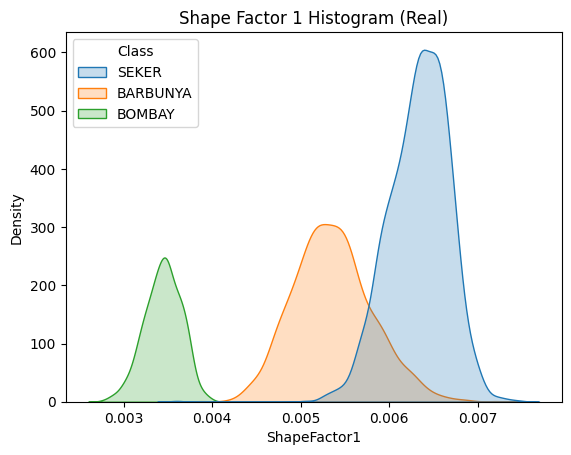

In [395]:
sb.kdeplot(data=bean_information, x="ShapeFactor1", hue="Class", fill=True)
plt.title("Shape Factor 1 Histogram (Real)")

When clustering using only ShapeFactor1, the algorithm was able to almost perfectly separate the classes, which is impressive considering that only a single shape attribute was used. This highlights that ShapeFactor1 alone carries strong class-discriminative information, even though it is less effective when combined with size attributes.

### 5.3 K-Means Clustering Limitations/Uncertainties

A key limitation of this clustering analysis is that only one shape attribute, ShapeFactor1, was included, since it was the only attribute showing reasonable discrimination between the bean classes. Most of the clustering signal came from the size-based attributes (Area, Perimeter, Major Axis Length, Equivalent Diameter), which strongly separated the classes. When including both size and shape attributes, the K-Means algorithm sometimes misclassified points between clusters, likely because the shape attribute did not provide strong additional separation. If the dataset were less size-dependent, or if more discriminative shape attributes were available, the clustering algorithm might have struggled more to identify meaningful groups, highlighting the importance of carefully selecting features that capture the relevant variation in the data

### 5.4 K-Means Clustering Conclusions

The K-Means clustering analysis demonstrates that the algorithm can largely recover the natural groupings of the bean classes based on size-related attributes, such as Area, Perimeter, Major Axis Length, and Equivalent Diameter. Including ShapeFactor1 added some nuance, but its limited discriminative power meant that misclassifications occurred when combining size and shape attributes. This highlights that the algorithm primarily relies on features with clear separation to identify clusters. Overall, the analysis shows that K-Means can effectively capture the dominant sources of variation in the dataset, but the results are sensitive to feature selection, particularly when shape attributes provide less clear distinction between classes.

# Task 6: Principal Component Analysis

## 6.1 Analysis

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
features = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity", "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"]

In [398]:
X = bean_information[features]

In [399]:
y = bean_information["Class"]

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Here we split data into a training and testing to allow PCA to be fitted on training data only, to ensure that information leaks into evaluation.

In [401]:
from sklearn.preprocessing import StandardScaler

In [402]:
scaleStandard = StandardScaler()

In [403]:
X_train = scaleStandard.fit_transform(X_train)

We scale the features of the dataset to a mean of 0 and variance 1 so that larger variables such as Area don't dominate the PCA, and variables like Aspect ratio, would have the same feature scale as Area. 

In [404]:
bean_information.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [405]:
X_train = pd.DataFrame(X_train, columns = [['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

In [406]:
X_train.head(10)

Area Perimeter MajorAxisLength MinorAxisLength AspectRation  \
0  3.114679  2.688848        2.797758        2.765763     1.458408   
1 -0.659339 -0.833687       -0.787340       -0.656473    -0.887347   
2 -0.650058 -0.764902       -0.702942       -0.756096    -0.415192   
3 -0.648362 -0.777351       -0.708388       -0.736003    -0.475320   
4 -0.078580  0.439625        0.252993       -0.241911     1.324347   
5 -0.649589 -0.818735       -0.773240       -0.641011    -0.872775   
6 -0.541871 -0.662252       -0.702633       -0.340770    -1.200211   
7  0.234534  0.604429        0.356856        0.454933     0.216554   
8 -0.142837  0.009960        0.041003       -0.153242     0.542714   
9  0.013631  0.279544        0.253024        0.009782     0.781605   

  Eccentricity ConvexArea EquivDiameter    Extent  Solidity roundness  \
0     1.244090   3.102386      2.804659 -1.341513 -0.223140 -0.461300   
1    -0.834486  -0.664318     -0.742348  0.577420  1.105183  1.183411   
2    -0.173327  -0.652650     -0.727886 -0.493556  0.510234  0.600714   
3    -0.246449  -0.652782     -0.725252 -0.075667  0.945090  0.750881   
4     1.178245  -0.068221      0.048280  1.778606 -1.902357 -2.545663   
5    -0.810628  -0.654865     -0.727158  0.475750  1.153815  1.166827   
6    -1.419997  -0.546392     -0.564713  0.201797  0.761324  1.036253   
7     0.457742   0.248535      0.407368 -1.200728 -2.148554 -1.507057   
8     0.709467  -0.142262     -0.030112 -1.298494 -0.494980 -0.474082   
9     0.870381   0.019505      0.157777 -1.737224 -1.247167 -1.054672   

  Compactness ShapeFactor1 ShapeFactor2 ShapeFactor3 ShapeFactor4  
0   -1.428832    -2.333530    -1.687463    -1.402212    -2.432468  
1    0.896555     0.751882     0.950839     0.893983     0.696936  
2    0.358428     0.934539     0.580473     0.330473     0.931897  
3    0.412339     0.905983     0.611361     0.386055     0.430053  
4   -1.275418     0.092022    -0.860455    -1.261858    -0.156533  
5    0.879161     0.723570     0.918786     0.875466     0.707270  
6    1.289521     0.224876     0.982833     1.317712     0.663515  
7   -0.339173    -0.749919    -0.674109    -0.371227    -1.196068  
8   -0.606570    -0.042897    -0.538392    -0.631572     0.355570  
9   -0.840946    -0.242828    -0.745509    -0.855839    -0.683968

In [407]:
X_train.describe().round(3)

Area Perimeter MajorAxisLength MinorAxisLength AspectRation  \
count  3088.000  3088.000        3088.000        3088.000     3088.000   
mean      0.000     0.000           0.000          -0.000       -0.000   
std       1.000     1.000           1.000           1.000        1.000   
min      -0.883    -1.147          -1.167          -1.107       -1.976   
25%      -0.647    -0.783          -0.762          -0.655       -0.867   
50%      -0.433    -0.457          -0.434          -0.382       -0.252   
75%       0.121     0.438           0.384           0.176        0.848   
max       4.165     3.472           3.403           3.787        2.971   

      Eccentricity ConvexArea EquivDiameter    Extent  Solidity roundness  \
count     3088.000   3088.000      3088.000  3088.000  3088.000  3088.000   
mean        -0.000      0.000        -0.000    -0.000    -0.000     0.000   
std          1.000      1.000         1.000     1.000     1.000     1.000   
min         -4.265     -0.883        -1.118    -3.799    -4.212    -3.819   
25%         -0.801     -0.651        -0.723    -0.503    -0.671    -0.778   
50%          0.012     -0.441        -0.412     0.190     0.344     0.241   
75%          0.913      0.129         0.284     0.658     0.792     0.892   
max          1.797      4.261         3.474     2.844     1.418     1.394   

      Compactness ShapeFactor1 ShapeFactor2 ShapeFactor3 ShapeFactor4  
count    3088.000     3088.000     3088.000     3088.000     3088.000  
mean       -0.000        0.000       -0.000        0.000       -0.000  
std         1.000        1.000        1.000        1.000        1.000  
min        -2.412       -2.760       -1.872       -2.264       -6.679  
25%        -0.893       -0.447       -0.856       -0.904       -0.310  
50%         0.153        0.298        0.118        0.121        0.366  
75%         0.869        0.753        0.888        0.865        0.661  
max         2.410        1.714        2.420        2.583        0.974

Here we can see that after standardising our data that the mean and standard deviation for every attribute is 0 and 1 respectively, this means its ready for PCA.

In [408]:
from sklearn.decomposition import PCA

In [409]:
pca1 = PCA()

In [410]:
X_pca1 = pca1.fit_transform(X_train)

We fit PCA on the scaled training set to extract new orthogonal components that capture maximum variance.

In [411]:
pca1.explained_variance_ratio_

array([7.04227451e-01, 1.60974355e-01, 5.26333549e-02, 4.61129794e-02,
       2.43262477e-02, 5.47447677e-03, 3.81524495e-03, 1.76375342e-03,
       2.70111166e-04, 1.87974677e-04, 7.71638392e-05, 5.79240001e-05,
       3.24108281e-05, 2.33689367e-05, 1.36004852e-05, 9.58328037e-06])

Following Graphs from Prasad Ostwal Github

In [412]:
import matplotlib.pyplot as plt

In [413]:
import numpy as np

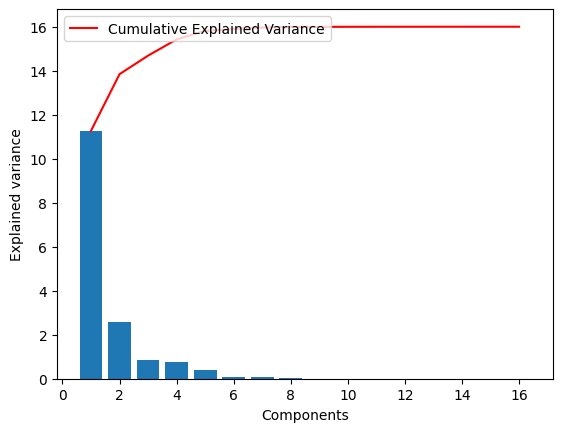

In [414]:
plt.bar(range(1,len(pca1.explained_variance_ )+1), pca1.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca1.explained_variance_)+1),
               np.cumsum(pca1.explained_variance_),
               c='red',
               label="Cumulative Explained Variance")
plt.legend(loc='upper left')

Above bar chart shows not only the percentage of variance given the number of components, but also display is it with a cumulative distribution function (CDF), emphasises the elbow effect present. 

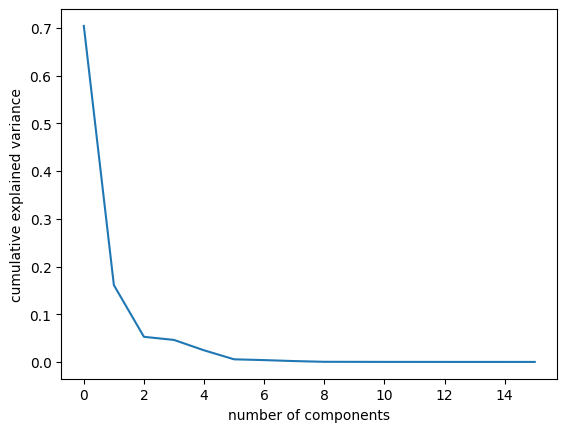

In [415]:
 plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here the Probability Density Function (PDF) shows the function of variance as a percentage as the number of components increases. 

In [416]:
pca2 = PCA(0.95)

Here we keep only 95% of the components to reduce redundant components in order to reduce dimensions while maintaining informaiton

In [417]:
X_pca2 = pca2.fit_transform(X_train)

In [418]:
X_pca2.shape

(3088, 4)

In [419]:
pca2.explained_variance_ratio_

array([0.70422745, 0.16097435, 0.05263335, 0.04611298])

The explained variance ratio indicates the proportion of total variance captured by each component. The first two components account for over 86% of the variance (Component 1: 70.42%, Component 2: 16.1%), while Component 3 drops sharply to 5.26%, demonstrating an elbow effect. For this reason, we will reduce the data to two components for visualization.

In [420]:
pca2c = PCA(n_components=2)

In [421]:
X_pca2c = pca2c.fit_transform(X_train)

We reduce to 2 components for visualization, so that we can see how well PCA separates the classes in two dimensions.

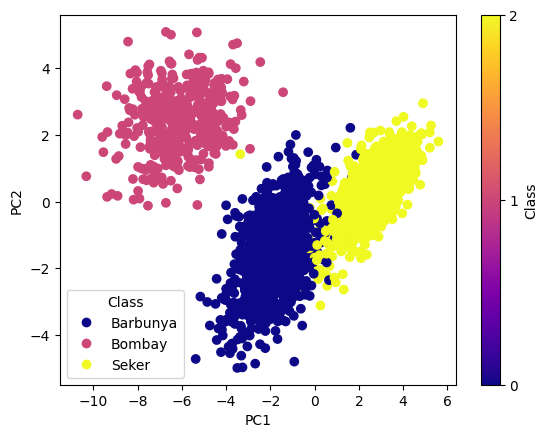

In [422]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

class_mapping = {0: "Barbunya",1: "Bombay",2: "Seker"}

handles = [plt.Line2D([], [], marker="o", linestyle="", color=scatter.cmap(scatter.norm(class_id)), label=class_name)
    for class_id, class_name in class_mapping.items()]

plt.figure()
scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1], c=y_encoded,cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, ticks=[0,1,2], label='Class')
plt.legend(title="Class", handles=handles)
plt.show()

In 2D, we can see clear class seperation besides slight overlap between Barbunya and Seker beans, this indicates that PCA discriminated well, managing to retain its discriminatory power.

Although the first two components capture over 86% of the variance, we next explore a three-component PCA to investigate whether the third component, despite its lower explained variance (5.26%), reveals additional structure or separation in the data.

In [423]:
pca3c = PCA(n_components=3)

In [424]:
X_pca3c = pca3c.fit_transform(X_train)

/tmp/ipykernel_862917/3479688914.py:12: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 3 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Class')


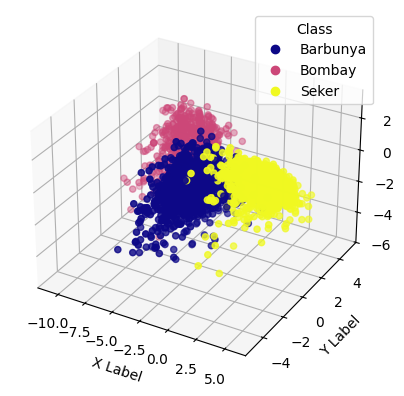

In [425]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca3c[:,0], X_pca3c[:,1], X_pca3c[:,2], c=y_encoded, cmap='plasma')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.colorbar(scatter, label='Class')
plt.legend(title="Class", handles=handles)
plt.show()

The 3D analysis above, while showing some class separation, does not substantially improve interpretation compared to the 2-component figure. Since the third component contributes only around 5% of the variance, including it increases plot complexity without adding meaningful insight. Additionally, 3D plots are harder to interpret due to depth perception limitations, making group separation less clear. Overall, although separation is visible, the 2D analysis provides a clearer and more interpretable representation of the data.

## 6.2 General Limitations and Conclusions

In this analysis, PCA was applied to the standardized bean dataset to reduce dimensionality while retaining the majority of the variance. The first two principal components captured over 86% of the total variance and were sufficient to clearly separate most classes in a 2D visualization, with only minor overlap between Barbunya and Seker beans. Exploring a third component showed that it contributed only an additional 5% of variance and did not substantially improve class separation in a 3D plot, which also introduced interpretability challenges due to depth perception and visual clutter. While PCA effectively reduced dimensionality and highlighted patterns in the data, it is important to note its limitations: it assumes linear relationships between features, does not handle nonlinear structures well, and the components themselves can be difficult to interpret in terms of the original features. Overall, PCA provided a useful overview of variance structure and class separability, but careful consideration of its assumptions and limitations is necessary when applying it to more complex or nonlinear datasets.